In [ ]:
!pip install geopandas
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 20.5 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community import greedy_modularity_communities, label_propagation_communities, modularity
import os
import random
from scipy.special import factorial
from collections import Counter
from scipy.stats import poisson
import copy
import pandas as pd
import contextily as ctx
import geopandas as gpd
from matplotlib.patches import FancyArrowPatch
from matplotlib.cm import ScalarMappable, get_cmap
from matplotlib.colors import Normalize
from matplotlib.patches import Arc
import math
from matplotlib import ticker
import matplotlib.ticker as mtick
import warnings

In [ ]:
#Path Google Drive
from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/ProjectWork/WTO_trade_graphs_gml'
os.chdir(folder_path)



Mounted at /content/drive


In [ ]:
#Load all GML files
gml_files = [
    "WTO_trade_graph_2017.gml",
    "WTO_trade_graph_2018.gml",
    "WTO_trade_graph_2019.gml",
    "WTO_trade_graph_2020.gml",
    "WTO_trade_graph_2021.gml",
    "WTO_trade_graph_2022.gml"
]


graphs = {}

#Load each GML file into a NetworkX graph
for file in gml_files:
    graph = nx.read_gml(file)
    graphs[file] = graph



#Print the number of nodes and edges for each graph
print("\nSummary of Graphs:")
for file, graph in graphs.items():
    year = file.split('_')[-1].split('.')[0]
    print(f"Year: {year}")
    print(f"Number of nodes: {graph.number_of_nodes()}")
    print(f"Number of edges: {graph.number_of_edges()}\n")


Summary of Graphs:
Year: 2017
Number of nodes: 99
Number of edges: 2746

Year: 2018
Number of nodes: 99
Number of edges: 2533

Year: 2019
Number of nodes: 99
Number of edges: 2558

Year: 2020
Number of nodes: 100
Number of edges: 2362

Year: 2021
Number of nodes: 99
Number of edges: 2198

Year: 2022
Number of nodes: 100
Number of edges: 2210



In [ ]:
############################################################
#Sanity Check
############################################################

#Sanity Check for All Years
print("Sanity Check for All Years:")
for file in gml_files:
    graph = nx.read_gml(file)
    year = file.split('_')[-1].split('.')[0]

    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    density = nx.density(graph)


    undirected_graph = graph.to_undirected()
    is_connected = nx.is_connected(undirected_graph)
    components = list(nx.connected_components(undirected_graph)) if not is_connected else [set(graph.nodes)]
    largest_component_size = max(len(c) for c in components)
    percentage_largest = (largest_component_size / num_nodes) * 100


    print(f"\nYear: {year}")
    print(f"Number of nodes: {num_nodes}, Number of edges: {num_edges}")
    print(f"Density: {density:.4f}")
    print(f"Fully connected: {is_connected}")
    print(f"Number of components: {len(components)}")
    print(f"Largest component size: {largest_component_size} ({percentage_largest:.2f}%)")



Sanity Check for All Years:

Year: 2017
Number of nodes: 99, Number of edges: 2746
Density: 0.2830
Fully connected: True
Number of components: 1
Largest component size: 99 (100.00%)

Year: 2018
Number of nodes: 99, Number of edges: 2533
Density: 0.2611
Fully connected: True
Number of components: 1
Largest component size: 99 (100.00%)

Year: 2019
Number of nodes: 99, Number of edges: 2558
Density: 0.2637
Fully connected: True
Number of components: 1
Largest component size: 99 (100.00%)

Year: 2020
Number of nodes: 100, Number of edges: 2362
Density: 0.2386
Fully connected: True
Number of components: 1
Largest component size: 100 (100.00%)

Year: 2021
Number of nodes: 99, Number of edges: 2198
Density: 0.2266
Fully connected: True
Number of components: 1
Largest component size: 99 (100.00%)

Year: 2022
Number of nodes: 100, Number of edges: 2210
Density: 0.2232
Fully connected: True
Number of components: 1
Largest component size: 100 (100.00%)


# Sanity Check (Key Obersvations)

The semiconductor trade network remains fully connected from 2017 to 2022, with all countries forming a single component. The network consistently includes 99–100 nodes and 2,746 edges in 2017, decreasing to 2,210 edges in 2022.



*   The number of nodes remains stable over time (99–100).
*   A gradual reduction in edges is observed from 2746 edges in 2017 to 2210 edges in 2022

*   Network density shows a decreasing from 0.283 to 0.2232 (as the trade connections are becoming sparser)
*   The network remains fully connected across all years. There are no disconnected components, and the largest component consistently includes 100% of the nodes.


This thinning out of trade connection could be a sign of a shift toward regionalized trade partnerships or a concentration of trade with fewer partners.






## Visualize the Trade Network

In order to get a better undertanding of the data we start with visualizing our Trade Network on a world map.

Year 2017: Threshold for edge weights set at 2846078803.410752


<ipython-input-7-dd30c0e1b6f9>:77: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('RdYlGn')


Saved EPS file for year 2017 at /content/drive/MyDrive/ProjectWork/Output_EPS/Trade_Network_2017.eps


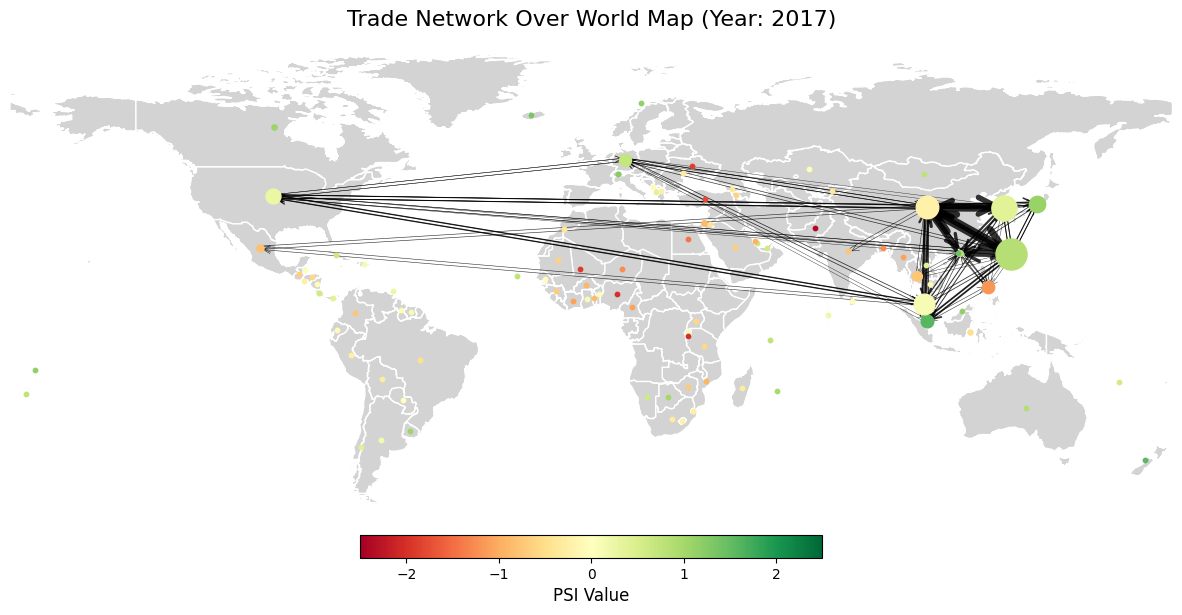

Year 2018: Threshold for edge weights set at 3018992821.44


<ipython-input-7-dd30c0e1b6f9>:77: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('RdYlGn')


Saved EPS file for year 2018 at /content/drive/MyDrive/ProjectWork/Output_EPS/Trade_Network_2018.eps


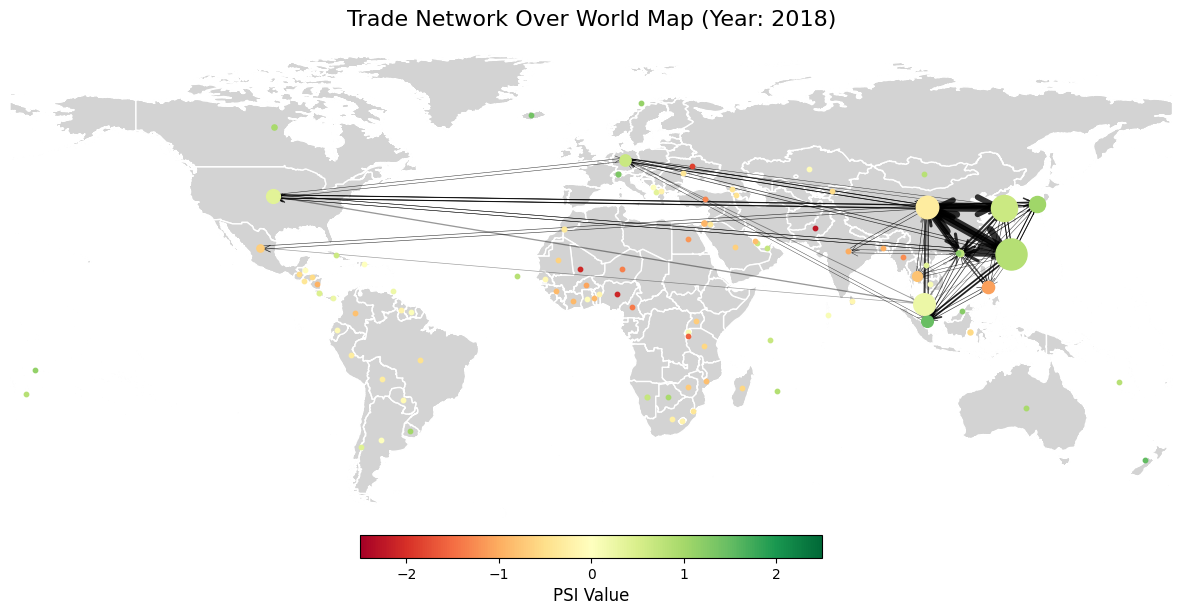

Year 2019: Threshold for edge weights set at 3024946403.291766


<ipython-input-7-dd30c0e1b6f9>:77: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('RdYlGn')


Saved EPS file for year 2019 at /content/drive/MyDrive/ProjectWork/Output_EPS/Trade_Network_2019.eps


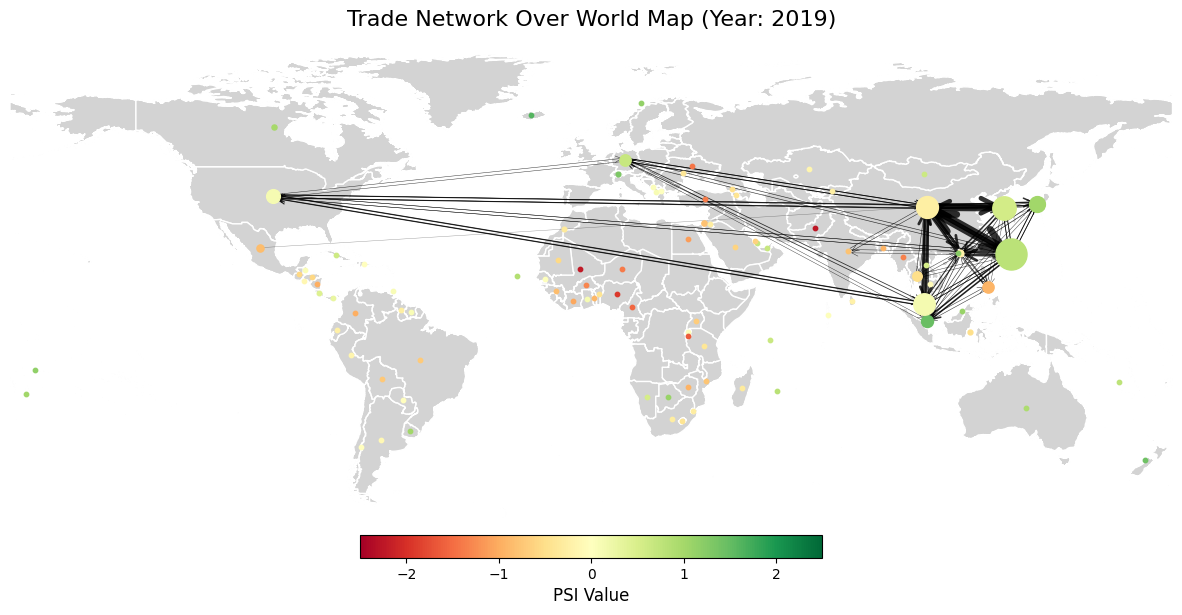

Year 2020: Threshold for edge weights set at 3433296730.756896


<ipython-input-7-dd30c0e1b6f9>:77: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('RdYlGn')


Saved EPS file for year 2020 at /content/drive/MyDrive/ProjectWork/Output_EPS/Trade_Network_2020.eps


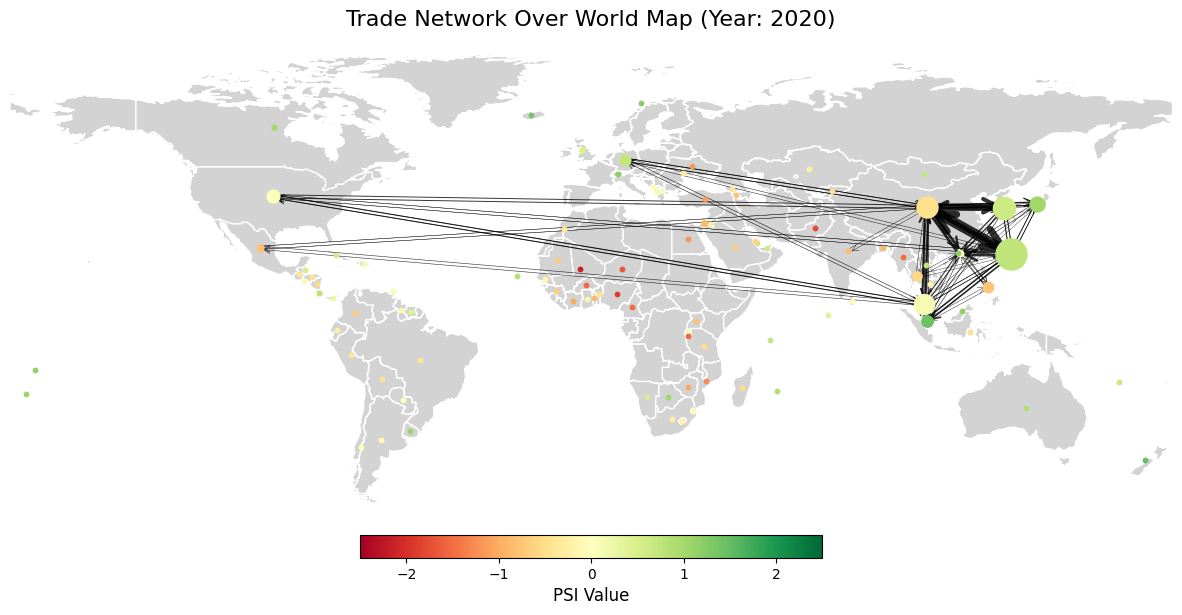

Year 2021: Threshold for edge weights set at 4863700047.597346


<ipython-input-7-dd30c0e1b6f9>:77: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('RdYlGn')


Saved EPS file for year 2021 at /content/drive/MyDrive/ProjectWork/Output_EPS/Trade_Network_2021.eps


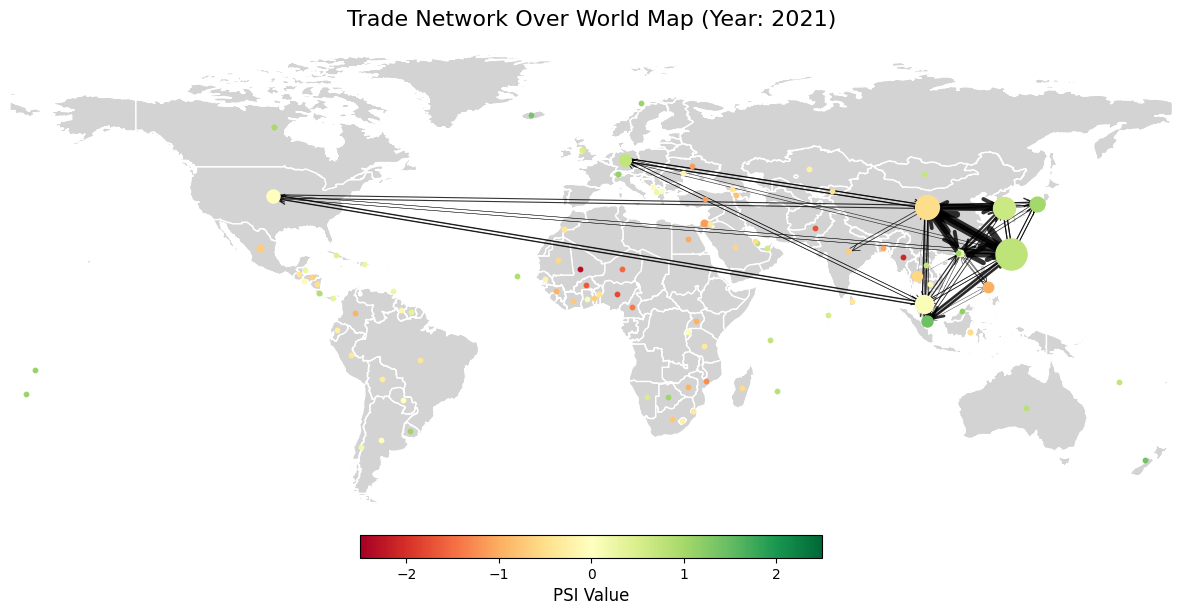

Year 2022: Threshold for edge weights set at 5112540483.376914


<ipython-input-7-dd30c0e1b6f9>:77: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('RdYlGn')


Saved EPS file for year 2022 at /content/drive/MyDrive/ProjectWork/Output_EPS/Trade_Network_2022.eps


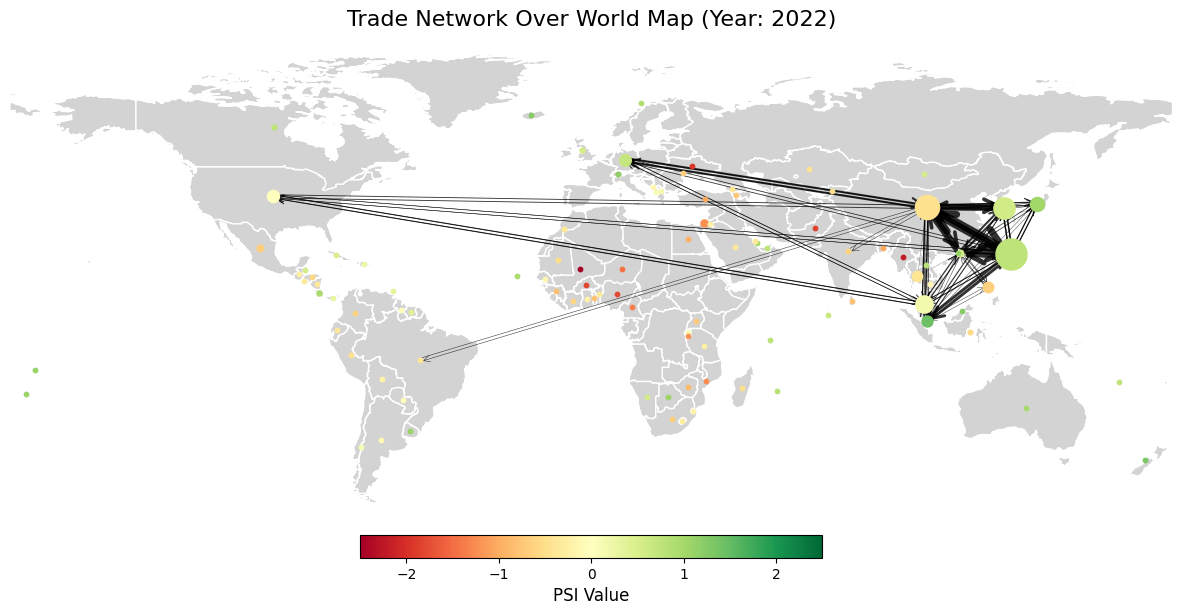

In [ ]:
# Define directories and years
gml_directory = "/content/drive/MyDrive/ProjectWork/WTO_trade_graphs_gml"
output_directory = "/content/drive/MyDrive/ProjectWork/Output_EPS"
os.makedirs(output_directory, exist_ok=True)

filtered_years = [2017, 2018, 2019, 2020, 2021, 2022]

# Process and visualize graphs for each year
for year in filtered_years:
    gml_file_path = os.path.join(gml_directory, f"WTO_trade_graph_{year}.gml")
    try:
        # Load the graph
        graph_trade = nx.read_gml(gml_file_path)

        # Extract edge weight values
        weight_values = list(nx.get_edge_attributes(graph_trade, "weight").values())

        # Compute the 95th percentile of the weights
        threshold = np.percentile(weight_values, 98)
        print(f"Year {year}: Threshold for edge weights set at {threshold}")

        # Create a filtered edge list for plotting
        edges_to_plot = [
            (edge, weight) for edge, weight in nx.get_edge_attributes(graph_trade, "weight").items()
            if weight >= threshold
        ]

        # Load world map data
        url = "https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip"
        world = gpd.read_file(url)

        # Create a mapping of country names to centroids
        country_coords = {
            row['ADMIN']: (row.geometry.centroid.x, row.geometry.centroid.y)
            for _, row in world.iterrows()
        }

        # Add missing nodes or clarify the position for the visulaization
        country_coords['Singapore'] = (103.8198, 1.3521)
        country_coords['Hong Kong'] = (114.1694, 22.3193)
        country_coords['European Union'] = (10.4515, 51.1657)
        country_coords['United States'] = (-98.5795, 39.8283)
        country_coords['Macau'] = (113.5491, 22.1987)
        country_coords['Samoa'] = (-172.1046, -13.7590)
        country_coords['Tanzania'] = (34.8888, -6.3690)
        country_coords['Bahrain'] = (50.5577, 26.0667)
        country_coords['Mauritius'] = (57.5522, -20.3484)
        country_coords['Seychelles'] = (55.4919, -4.6796)
        country_coords['Swaziland'] = (31.4659, -26.5225)
        country_coords['Cape Verde'] = (-23.0418, 15.1111)
        country_coords['Maldives'] = (73.2207, 3.2028)
        country_coords['Tonga'] = (-175.1982, -21.1789)
        country_coords['Taiwan'] = (130.0, 22.0)  # Adjusted position for better visualization
        country_coords['Malaysia'] = (103.0, 6.5)  # Change position of Malysia slightly north of Singapore

        # Extract node positions based on country names
        node_positions = {node: country_coords[node] for node in graph_trade.nodes() if node in country_coords}

        # Calculate the sum of outgoing weights for each node
        outgoing_weights_sum = {node: 0 for node in graph_trade.nodes()}
        for (source, target), weight in nx.get_edge_attributes(graph_trade, "weight").items():
            outgoing_weights_sum[source] += weight

        # Normalize outgoing weights for node sizes
        max_outgoing_weight = max(outgoing_weights_sum.values())
        min_outgoing_weight = min(outgoing_weights_sum.values())

        def normalize_node_size(weight, min_weight, max_weight, min_size=10, max_size=500):
            return min_size + (weight - min_weight) / (max_weight - min_weight) * (max_size - min_size)

        # Access PSI values for nodes
        psi_values = {node: data.get('PSI', 0) for node, data in graph_trade.nodes(data=True)}
        max_psi = max(psi_values.values())
        min_psi = min(psi_values.values())

        # Use the 'RdYlGn' colormap for PSI values
        cmap = get_cmap('RdYlGn')
        norm = Normalize(vmin=-2.5, vmax=2.5)  # Set fixed range from -2.5 to +2.5

        # Plot the world map
        fig, ax = plt.subplots(figsize=(15, 10))
        world.plot(ax=ax, color='lightgrey', edgecolor='white')

        # Add nodes to the plot with size based on outgoing weight sum and color based on PSI
        for node, (lon, lat) in node_positions.items():
            node_size = normalize_node_size(outgoing_weights_sum[node], min_outgoing_weight, max_outgoing_weight)
            psi = psi_values.get(node, min_psi)
            node_color = cmap(norm(psi))
            ax.scatter(lon, lat, color=node_color, s=node_size, zorder=5)

        # Normalize edge weights for thickness
        max_weight = max(weight for _, weight in edges_to_plot)
        min_weight = min(weight for _, weight in edges_to_plot)

        def normalize_weight(weight, min_weight, max_weight, min_thickness=0.3, max_thickness=5.0):
            return min_thickness + (weight - min_weight) / (max_weight - min_weight) * (max_thickness - min_thickness)

        # Adjusted edge plotting to separate bidirectional edges
        for (edge, weight) in edges_to_plot:
            if edge[0] in node_positions and edge[1] in node_positions:
                lon1, lat1 = node_positions[edge[0]]
                lon2, lat2 = node_positions[edge[1]]
                linewidth = normalize_weight(weight, min_weight, max_weight)

                # Dynamically scale arrowhead size
                arrowhead_scale = 10 + linewidth * 5  # Adjust scale multiplier as needed

                # Check if the reverse edge exists
                reverse_edge = (edge[1], edge[0]) in nx.get_edge_attributes(graph_trade, "weight")
                if reverse_edge:
                    # Offset the straight lines to avoid overlap
                    offset = 0.5  # Adjust curvature
                    dx = lon2 - lon1
                    dy = lat2 - lat1
                    length = math.sqrt(dx**2 + dy**2)
                    norm_dx = -dy / length  # Perpendicular direction x-component
                    norm_dy = dx / length   # Perpendicular direction y-component

                    # Apply offset to the current edge
                    lon1_offset = lon1 + norm_dx * offset
                    lat1_offset = lat1 + norm_dy * offset
                    lon2_offset = lon2 + norm_dx * offset
                    lat2_offset = lat2 + norm_dy * offset

                    # Plot the offset edge
                    arrow = FancyArrowPatch(
                        (lon1_offset, lat1_offset), (lon2_offset, lat2_offset),
                        color="black",
                        alpha=0.8,
                        linewidth=linewidth,
                        arrowstyle="->",
                        mutation_scale=arrowhead_scale,
                    )
                    ax.add_patch(arrow)

                    # Plot the reverse edge with the opposite offset
                    lon1_reverse_offset = lon1 - norm_dx * offset
                    lat1_reverse_offset = lat1 - norm_dy * offset
                    lon2_reverse_offset = lon2 - norm_dx * offset
                    lat2_reverse_offset = lat2 - norm_dy * offset

                    reverse_arrow = FancyArrowPatch(
                        (lon2_reverse_offset, lat2_reverse_offset), (lon1_reverse_offset, lat1_reverse_offset),
                        color="black",
                        alpha=0.8,
                        linewidth=linewidth,
                        arrowstyle="->",
                        mutation_scale=arrowhead_scale,
                    )
                    ax.add_patch(reverse_arrow)
                else:
                    # Create a straight arrow for one-directional edges
                    arrow = FancyArrowPatch(
                        (lon1, lat1), (lon2, lat2),
                        color="black",
                        alpha=0.4,
                        linewidth=linewidth,
                        arrowstyle="->",
                        mutation_scale=arrowhead_scale,
                    )
                    ax.add_patch(arrow)

        # Add a colorbar for PSI values
        sm = ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.03, pad=0.02)
        cbar.set_label('PSI Value', fontsize=12)

        # Set plot details
        ax.set_title(f'Trade Network Over World Map (Year: {year})', fontsize=16)
        ax.axis('off')
        ax.set_xlim([-180, 180])  # Longitude range (x-axis)
        ax.set_ylim([-60, 90])   # Latitude range (y-axis)

        eps_file_path = os.path.join(output_directory, f"Trade_Network_{year}.eps")
        plt.savefig(eps_file_path, format='eps', dpi=300)
        print(f"Saved EPS file for year {year} at {eps_file_path}")

        plt.show()  # Optionally display the plot

    except Exception as e:
        print(f"Error processing year {year}: {e}")


Our visualization highlights the top 2% of the largest trades (edges) between countries for each year. The size of each node reflects the total semiconductor exports of the corresponding country, emphasizing the significance of each node within the network. To provide insight into the stability of individual countries we've included the PSI value for each exporter for the respective year.

The visualization highlights a shift in semiconductor trade from a more globally distributed network to one increasingly concentrated in Asia. A comparison of the graph representations from 2017 to 2022 reveals a marked increase in trade among Asian countries. Furthermore, it is evident that the United States imports a large volume of semiconductor products while as an exporting significantly less in comparison.

# Descriptive Charts and Plots for Semiconductor Trade Network

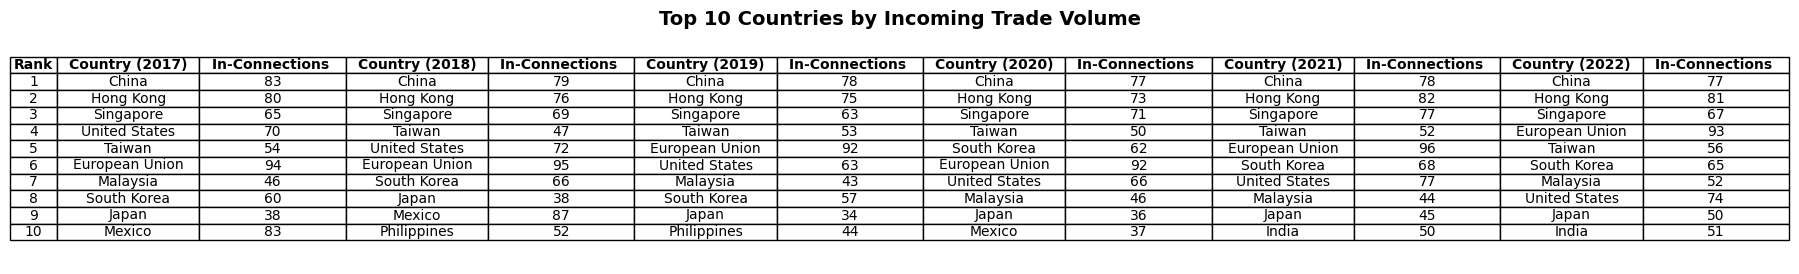

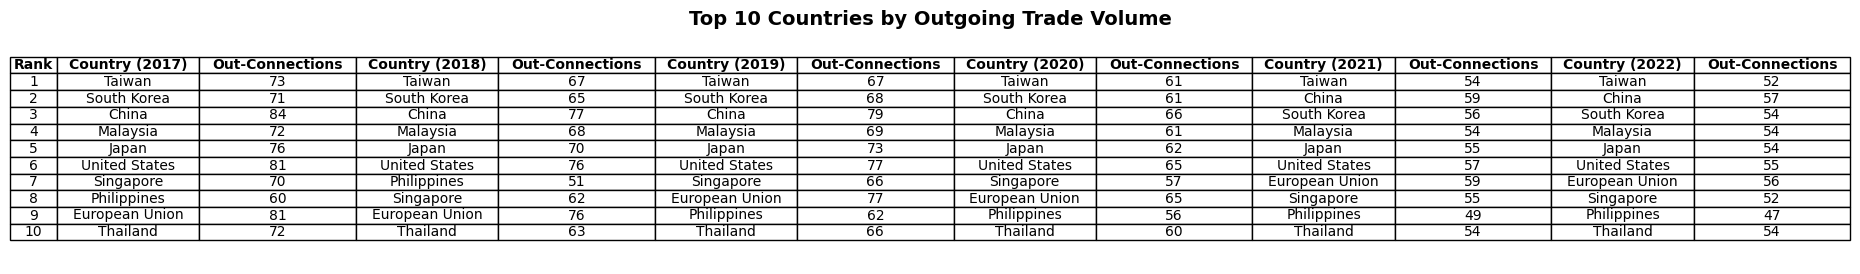

Saved EPS file at /content/drive/MyDrive/ProjectWork/Output_EPS/ST Trends.eps


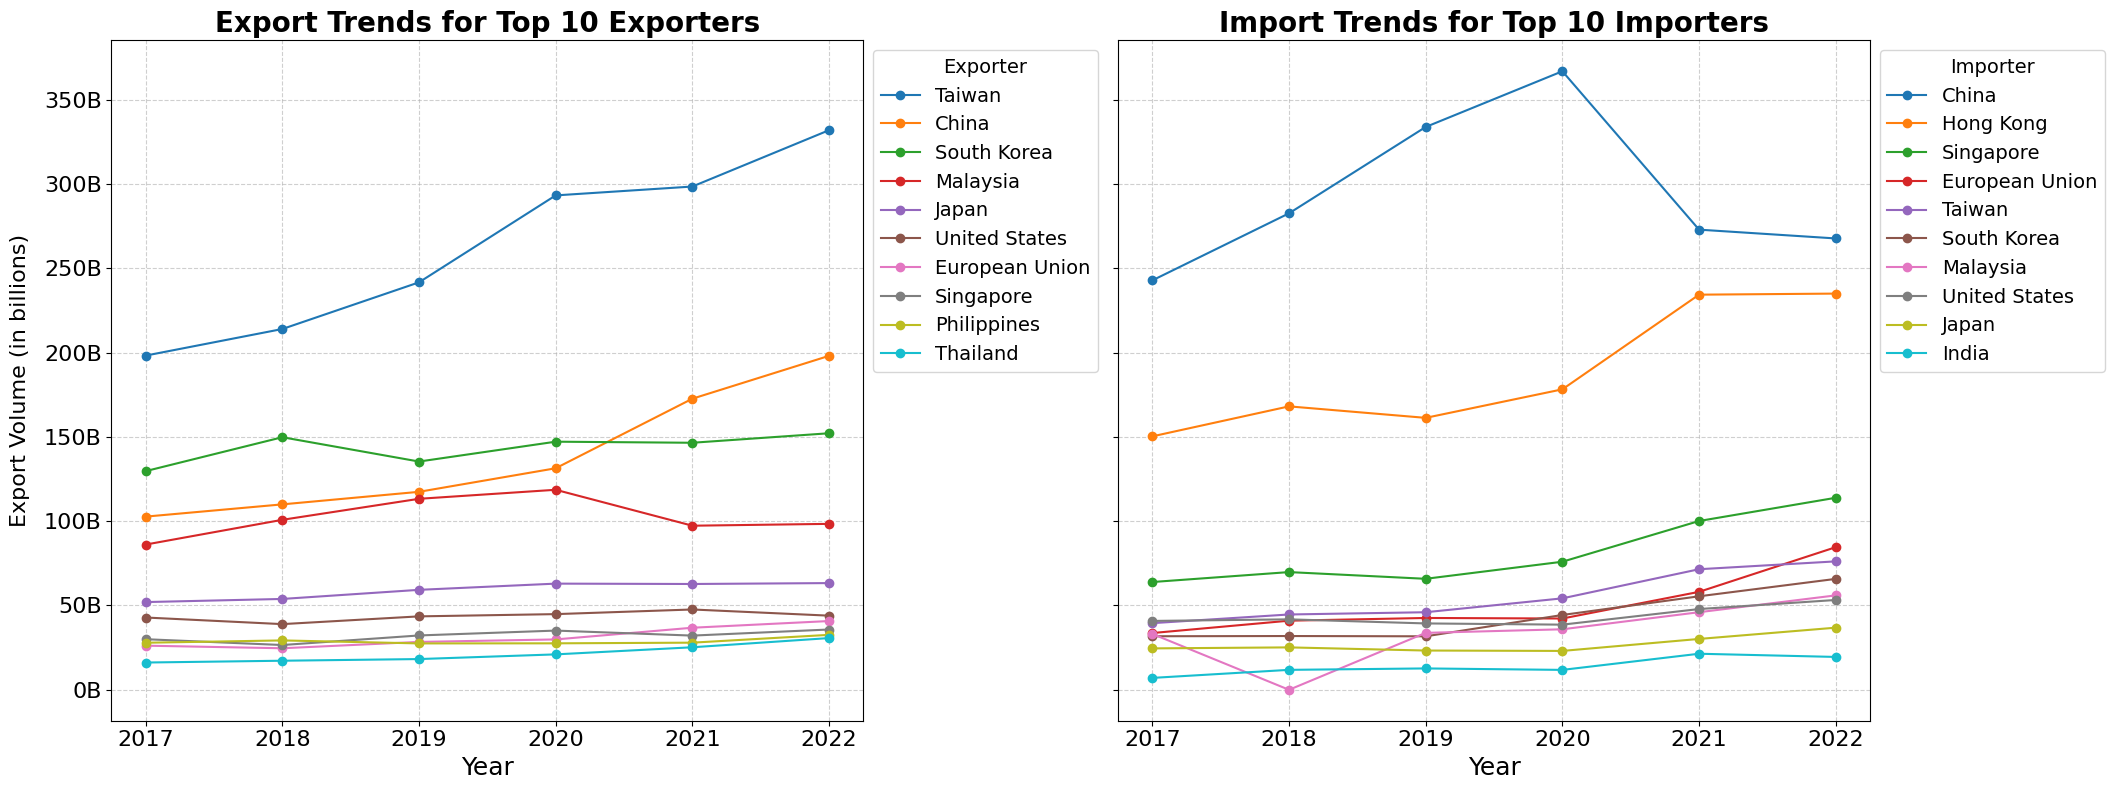

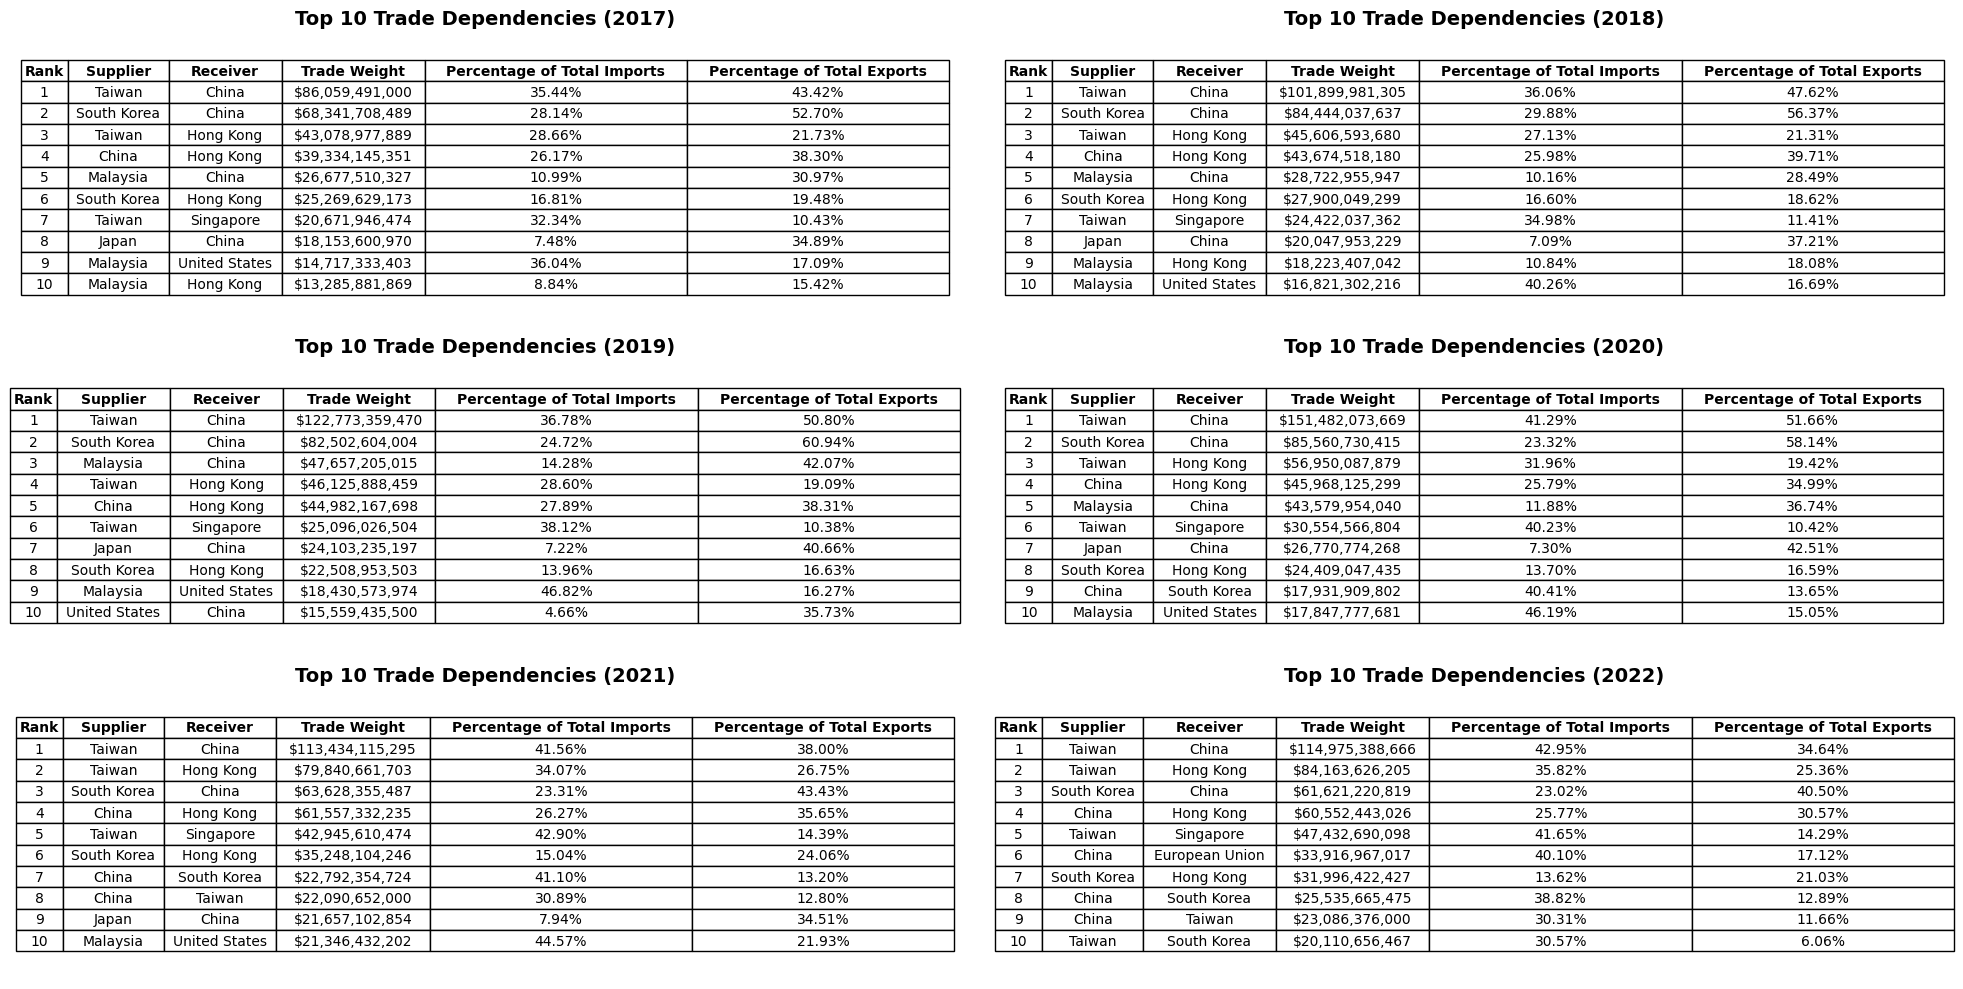

In [ ]:
############################################################
#Descriptive Charts and Plots for Trade Network
############################################################

########################################################################
#Rankings for Incoming and Outgoing Trade Volumes Over Years (Tables)
#Including number of out and ingoing connections
########################################################################

output_directory = "/content/drive/MyDrive/ProjectWork/Output_EPS"
os.makedirs(output_directory, exist_ok=True)

yearly_incoming_rankings = {}
yearly_outgoing_rankings = {}

#Perform the analysis for each year
for file in gml_files:
    graph = nx.read_gml(file)
    year = file.split('_')[-1].split('.')[0]

    #Calculate incoming and outgoing trade volumes and connections
    incoming_trade_volume = {}
    outgoing_trade_volume = {}
    incoming_connections = {}
    outgoing_connections = {}

    for node in graph.nodes():
        incoming = sum(data['weight'] for _, _, data in graph.in_edges(node, data=True))
        outgoing = sum(data['weight'] for _, _, data in graph.out_edges(node, data=True))
        in_connections = len(list(graph.in_edges(node)))
        out_connections = len(list(graph.out_edges(node)))
        incoming_trade_volume[node] = incoming
        outgoing_trade_volume[node] = outgoing
        incoming_connections[node] = in_connections
        outgoing_connections[node] = out_connections

    #Rank nodes by incoming and outgoing trade volumes
    ranked_incoming_trade = sorted(incoming_trade_volume.keys(), key=lambda x: incoming_trade_volume[x], reverse=True)
    ranked_outgoing_trade = sorted(outgoing_trade_volume.keys(), key=lambda x: outgoing_trade_volume[x], reverse=True)

    #Store rankings for incoming
    rankings_for_incoming = []
    for rank, node in enumerate(ranked_incoming_trade[:10], start=1):  #Top 10 countries
        rankings_for_incoming.append((rank, node, incoming_connections[node]))

    #Store rankings for outgoing
    rankings_for_outgoing = []
    for rank, node in enumerate(ranked_outgoing_trade[:10], start=1):  #Top 10 countries
        rankings_for_outgoing.append((rank, node, outgoing_connections[node]))

    year_list_incoming = [{"Country": entry[1], "Incoming Connections": entry[2]} for entry in rankings_for_incoming]
    yearly_incoming_rankings[year] = pd.DataFrame(year_list_incoming)

    year_list_outgoing = [{"Country": entry[1], "Outgoing Connections": entry[2]} for entry in rankings_for_outgoing]
    yearly_outgoing_rankings[year] = pd.DataFrame(year_list_outgoing)


final_combined_incoming_df = pd.DataFrame()
final_combined_incoming_df["Rank"] = range(1, 11)

for year, df in yearly_incoming_rankings.items():
    df.columns = [f"Country ({year})", f"In-Connections "]
    final_combined_incoming_df = pd.concat([final_combined_incoming_df, df], axis=1)


final_combined_outgoing_df = pd.DataFrame()
final_combined_outgoing_df["Rank"] = range(1, 11)

for year, df in yearly_outgoing_rankings.items():
    df.columns = [f"Country ({year})", f"Out-Connections"]
    final_combined_outgoing_df = pd.concat([final_combined_outgoing_df, df], axis=1)

#Plot Combined Rankings (Table for Incoming)
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')
incoming_table = ax.table(
    cellText=final_combined_incoming_df.values,
    colLabels=final_combined_incoming_df.columns,
    cellLoc='center',
    loc='center',
)
incoming_table.auto_set_font_size(False)
incoming_table.set_fontsize(10)
incoming_table.auto_set_column_width(col=list(range(len(final_combined_incoming_df.columns))))

for key, cell in incoming_table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(weight='bold')

plt.title("Top 10 Countries by Incoming Trade Volume", fontsize=14, weight="bold")
plt.show()

#Plot Combined Rankings (Table for Outgoing)
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')
outgoing_table = ax.table(
    cellText=final_combined_outgoing_df.values,
    colLabels=final_combined_outgoing_df.columns,
    cellLoc='center',
    loc='center',
)
outgoing_table.auto_set_font_size(False)
outgoing_table.set_fontsize(10)
outgoing_table.auto_set_column_width(col=list(range(len(final_combined_outgoing_df.columns))))

for key, cell in outgoing_table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(weight='bold')

plt.title("Top 10 Countries by Outgoing Trade Volume", fontsize=14, weight="bold")
plt.show()


########################################################################
# Exports and Imports Trends Over the Years (Time Plot)
########################################################################

export_data = {}
import_data = {}


for file in gml_files:
    graph = nx.read_gml(file)
    year = file.split('_')[-1].split('.')[0]

    #Calculate weighted out-degree (export volume) and in-degree (import volume)
    weighted_out_degree = {node: sum(data['weight'] for _, _, data in graph.out_edges(node, data=True)) for node in graph.nodes()}
    weighted_in_degree = {node: sum(data['weight'] for _, _, data in graph.in_edges(node, data=True)) for node in graph.nodes()}

    # Store export and import volumes for each node for this year
    for node, volume in weighted_out_degree.items():
        if node not in export_data:
            export_data[node] = {}
        export_data[node][year] = volume

    for node, volume in weighted_in_degree.items():
        if node not in import_data:
            import_data[node] = {}
        import_data[node][year] = volume


export_df = pd.DataFrame(export_data).T.fillna(0)
import_df = pd.DataFrame(import_data).T.fillna(0)

#Calculate the top 10 exporters and importers
latest_year = max(export_df.columns, key=int)
top_exporters = export_df[latest_year].sort_values(ascending=False).head(10).index
top_importers = import_df[latest_year].sort_values(ascending=False).head(10).index


top_export_df = export_df.loc[top_exporters]
top_import_df = import_df.loc[top_importers]

#Plot the export and import trends for the top 10 countries
fig, axs = plt.subplots(1, 2, figsize=(25, 8), sharey=True)

#Export trends
for exporter in top_export_df.index:
    axs[0].plot(top_export_df.columns, top_export_df.loc[exporter], marker='o', label=exporter)

axs[0].set_title("Export Trends for Top 10 Exporters", fontsize=20, weight='bold')
axs[0].set_xlabel("Year", fontsize=18)
axs[0].set_ylabel("Export Volume (in billions)", fontsize=16, labelpad=10)
axs[0].grid(True, linestyle='--', alpha=0.6)

axs[0].tick_params(axis='both', which='major', labelsize=16)
axs[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e9:.0f}B'))

#Import trends
for importer in top_import_df.index:
    axs[1].plot(top_import_df.columns, top_import_df.loc[importer], marker='o', label=importer)

axs[1].set_title("Import Trends for Top 10 Importers", fontsize=20, weight='bold')
axs[1].set_xlabel("Year", fontsize=18)
axs[1].grid(True, linestyle='--', alpha=0.6)

axs[1].tick_params(axis='both', which='major', labelsize=16)
axs[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e9:.0f}B'))


axs[0].legend(title="Exporter", fontsize=14, loc='upper left', bbox_to_anchor=(1, 1), title_fontsize=14)
axs[1].legend(title="Importer", fontsize=14, loc='upper left', bbox_to_anchor=(1, 1), title_fontsize=14)


plt.tight_layout(rect=[0, 0, 0.85, 1])


#Save the figure as .eps for report
eps_file_path = os.path.join(output_directory, f"ST Trends.eps")
plt.savefig(eps_file_path, format='eps', bbox_inches='tight', dpi=300)
print(f"Saved EPS file at {eps_file_path}")

plt.show()


########################################################################
#Top Trade Dependencies (Tables)
########################################################################

dependency_dfs = []

#Loop through each year and calculate dependencies
for file in gml_files:
    graph = nx.read_gml(file)
    year = file.split('_')[-1].split('.')[0]

    #Calculate total incoming and outgoing trade volumes for each node
    incoming_trade_volume = {
        node: sum(data['weight'] for _, _, data in graph.in_edges(node, data=True))
        for node in graph.nodes()
    }
    outgoing_trade_volume = {
        node: sum(data['weight'] for _, _, data in graph.out_edges(node, data=True))
        for node in graph.nodes()
    }

    #Collect dependency data
    dependencies = []
    for u, v, data in graph.edges(data=True):
        weight = data.get('weight', 0)
        total_received = incoming_trade_volume.get(v, 0)
        total_sent = outgoing_trade_volume.get(u, 0)
        percentage_receiver = (weight / total_received * 100) if total_received > 0 else 0
        percentage_supplier = (weight / total_sent * 100) if total_sent > 0 else 0
        dependencies.append((u, v, weight, f"{percentage_receiver:.2f}%", f"{percentage_supplier:.2f}%"))

    #Sort by weight (high dependency)
    sorted_dependencies = sorted(dependencies, key=lambda x: x[2], reverse=True)[:10]  #Top 10 trade dependencies
    dependency_df = pd.DataFrame(
        sorted_dependencies,
        columns=["Supplier", "Receiver", "Trade Weight", "Percentage of Total Imports", "Percentage of Total Exports"]
    )


    dependency_df["Trade Weight"] = dependency_df["Trade Weight"].apply(lambda x: f"${x:,.0f}")

    dependency_df.insert(0, "Rank", range(1, len(dependency_df) + 1))

    dependency_dfs.append((year, dependency_df))


#Plot the dependencies tables
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
axs = axs.flatten()

for i, (year, dependency_df) in enumerate(dependency_dfs):
    axs[i].axis('off')
    table = axs[i].table(
        cellText=dependency_df.values,
        colLabels=dependency_df.columns,
        cellLoc='center',
        loc='center',
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(dependency_df.columns))))


    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight="bold")

    axs[i].set_title(f"Top 10 Trade Dependencies ({year})", fontsize=14, weight="bold")


plt.tight_layout()
plt.show()




# Descriptive Statistic

### **Top 5 Exporters**
*   Taiwan: Largest exporter, with steady growth from 2017 (200B) to 2022 (340B).
*   China: Significant growth, rising from 100B in 2017 to 200B in 2022.

*   South Korea: Exports remained stable, fluctuating between 130B and 150B.
*   Malaysia and Japan: Both saw modest increases, but Malaysia experienced a dip in 2021.

### **Top 5 Importers**
*   China: Largest importer, peaking in 2020 (360B) before declining to 270B in 2022.
*   Hong Kong: Significant growth in imports, rising sharply after 2020
*   Singapore: Imports grew steadily, doubling from 2017 (60B) to 2022 (120B).
*   European Union and South Korea: Gradual increases over the observed years.


Export trends show Taiwan and China dominating the market. Import trends highlight China as a key player, despite its recent decline.


### **Trade dependencies**

The trade dependency analysis reveals significant concentration in global trade relationships, particularly involving China and major East Asian economies. Taiwan consistently emerges as China's top supplier, with trade volumes increasing from 86B in 2017 to $151B in 2020, before stabilizing at 115B in 2022. Taiwan's exports to China consistently accounted for 34%–51% of its total exports, while China's imports from Taiwan ranged between 35%–43%.

Similarly, South Korea demonstrates strong reliance on China, with exports to China making up 40%–61% of its total exports, peaking in 2019.

Regional hubs like Hong Kong and Singapore play important roles as trade intermediaries, receiving substantial portions of China's and Taiwan’s exports. For instance, Hong Kong absorbs around 31-40% of China's total exports. Malaysia also stands out, balancing trade flows to both China and the United States, with up to 47% of its total imports are from malaysia in 2019.


The findings underscore a pattern of export concentration, where a few trade partners dominate global flows. This highlights the interconnectedness of East Asian economies and suggests a high degree of dependency on key trade relationships, particularly with China and Taiwan as the central nodes.








# Network Structure Analysis

Network Structure Analysis for All Years

Year: 2017
------------------------------------------------------------

Clustering Information:
  Average Weighted Clustering Coefficient: 0.0002

Community Information:
  Number of Clusters (Strongly Connected Components): 15
  Cluster Sizes and Nodes:
    Cluster 1: 85 nodes
      Countries: Nicaragua, Saudi Arabia, Israel, Mongolia, Myanmar, Cuba, Peru, Uganda, South Korea, Canada, India, Maldives, Nigeria, Laos, Guinea, China, Hong Kong, Philippines, Mauritius, Indonesia, Montenegro, Kyrgyzstan, Singapore, Colombia, Trinidad and Tobago, Dominican Republic, Norway, Burkina Faso, Tonga, South Africa, Seychelles, Macau, Lesotho, Benin, Uruguay, Rwanda, Togo, Ecuador, Malaysia, Namibia, Mexico, Senegal, Cambodia, Brazil, Ivory Coast, Iceland, Paraguay, Kazakhstan, Burundi, Albania, Ukraine, Swaziland, Chile, Japan, United States, Qatar, Ghana, Taiwan, Samoa, Mauritania, Guatemala, Madagascar, Bolivia, Sri Lanka, Egypt, New Zealand, Niger, Nort

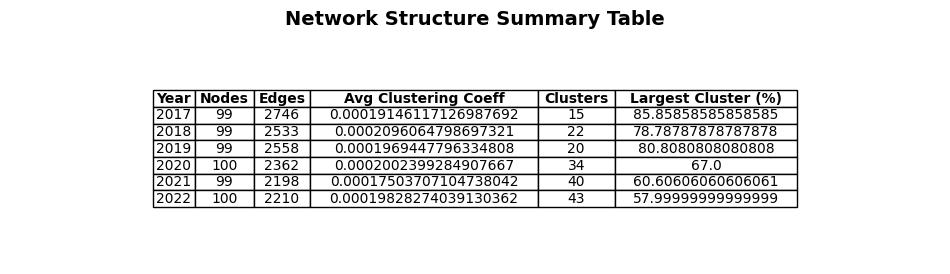

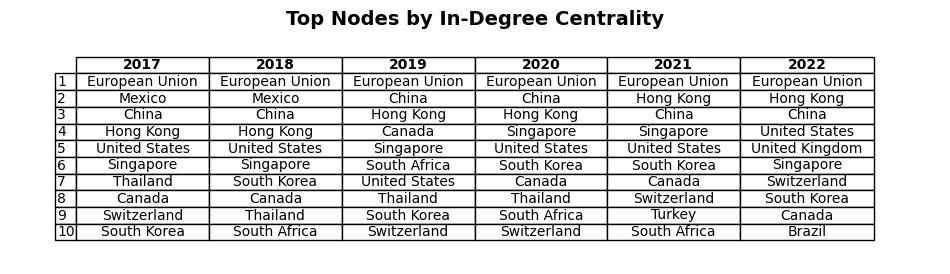

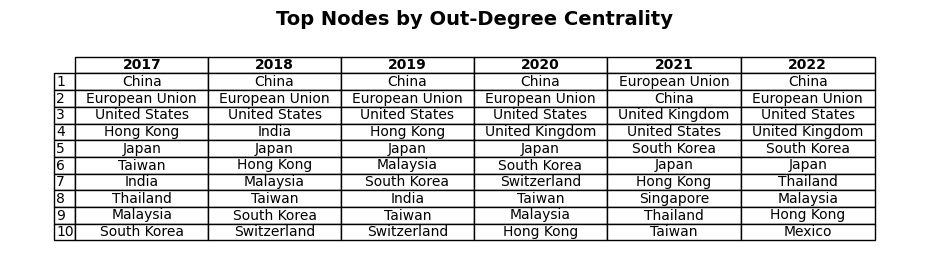

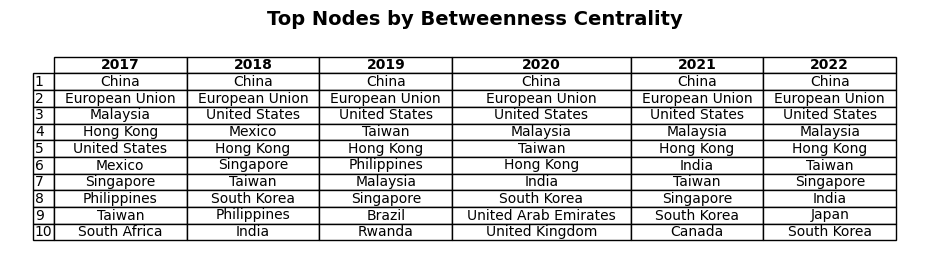

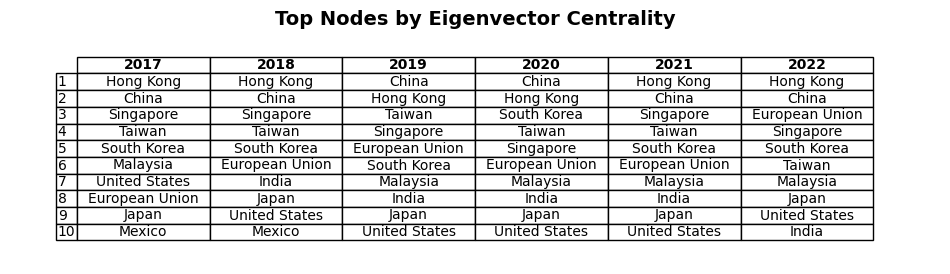

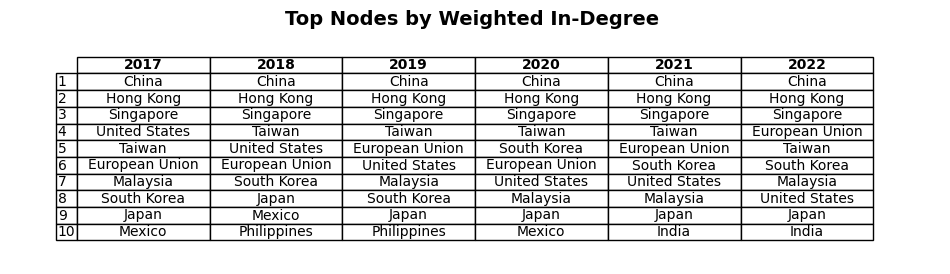

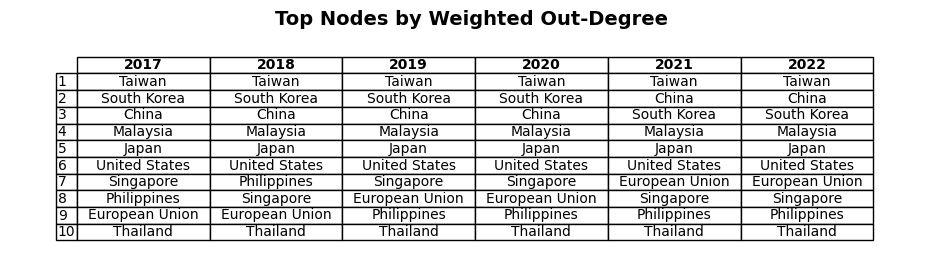

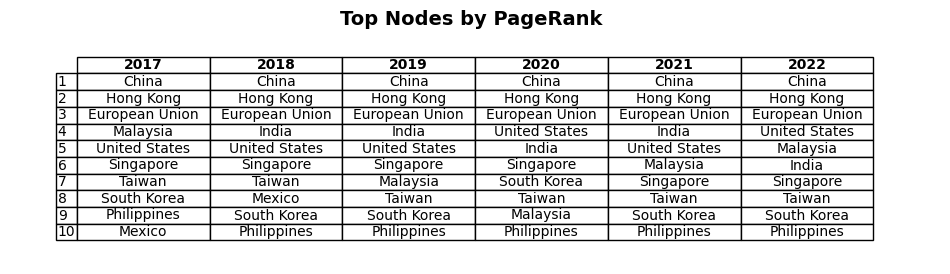

In [ ]:
############################################################
#Network Structure Analysis
############################################################

summary_data = []
hubs_data = []
pagerank_data = []
weighted_degree_data = []

#Perform network structure analysis for each year
print("=" * 60)
print("Network Structure Analysis for All Years")
print("=" * 60)

for file in gml_files:
    graph = nx.read_gml(file)
    year = file.split('_')[-1].split('.')[0]

    print(f"\nYear: {year}")
    print("-" * 60)

    #Centrality Measures
    in_degree_centrality = nx.in_degree_centrality(graph) #metric in our case is problematic, as weigths aren't considered
    out_degree_centrality = nx.out_degree_centrality(graph) #metric in our case is problematic, as weigths aren't considered
    eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000, weight='weight')

    #Betweenness centrality treats weights as distances (lower = better connectivity), but in this network, weights represent trade volumes (higher = stronger connectivity).
    #Inverting ensures higher trade volumes contribute more to centrality.
    inverted_graph = graph.copy()
    for u, v, data in inverted_graph.edges(data=True):
        if data['weight'] > 0:
            data['weight'] = 1 / data['weight']
        else:
            data['weight'] = float('inf')

    betweenness_centrality = nx.betweenness_centrality(inverted_graph, weight='weight')


    #Weighted Degree Centrality
    weighted_in_degree_centrality = {node: sum(data['weight'] for _, _, data in graph.in_edges(node, data=True)) for node in graph.nodes()}
    weighted_out_degree_centrality = {node: sum(data['weight'] for _, _, data in graph.out_edges(node, data=True)) for node in graph.nodes()}

    #PageRank
    pagerank = nx.pagerank(graph, weight='weight')
    critical_hubs_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]

    for rank, (node, value) in enumerate(critical_hubs_pagerank, start=1):
        pagerank_data.append({"Year": year, "Rank": rank, "Node": node, "Value": value})



    #Top Weighted Degree Centrality
    top_weighted_in_degree = sorted(weighted_in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    top_weighted_out_degree = sorted(weighted_out_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

    #Add weighted degree centrality to data
    for rank, (node, value) in enumerate(top_weighted_in_degree, start=1):
        weighted_degree_data.append({"Year": year, "Metric": "Weighted In-Degree", "Rank": rank, "Node": node, "Value": value})
    for rank, (node, value) in enumerate(top_weighted_out_degree, start=1):
        weighted_degree_data.append({"Year": year, "Metric": "Weighted Out-Degree", "Rank": rank, "Node": node, "Value": value})

    #Top Hubs
    top_in_degree = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    top_out_degree = sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

    #Clustering Coefficients
    graph_undirected = graph.to_undirected()
    clustering_coefficients = nx.clustering(graph_undirected, weight='weight')
    avg_clustering = sum(clustering_coefficients.values()) / len(clustering_coefficients)
    print(f"\nClustering Information:")
    print(f"  Average Weighted Clustering Coefficient: {avg_clustering:.4f}")

    #Community Detection
    communities = list(nx.strongly_connected_components(graph))
    num_clusters = len(communities)
    print(f"\nCommunity Information:")
    print(f"  Number of Clusters (Strongly Connected Components): {num_clusters}")
    print(f"  Cluster Sizes and Nodes:")

    #Identify the largest cluster
    largest_cluster = max(communities, key=len)
    largest_cluster_size = len(largest_cluster)

    for i, community in enumerate(communities, start=1):
        cluster_size = len(community)
        if cluster_size > 1:
            cluster_nodes = ", ".join(community)
            print(f"    Cluster {i}: {cluster_size} nodes")
            print(f"      Countries: {cluster_nodes}")
        elif community == largest_cluster:

            cluster_nodes = ", ".join(community)
            print(f"\nLargest Cluster: {largest_cluster_size} nodes")
            print(f"  Countries: {cluster_nodes}")

    print("-" * 60)


    summary_data.append({
        "Year": year,
        "Nodes": graph.number_of_nodes(),
        "Edges": graph.number_of_edges(),
        "Avg Clustering Coeff": avg_clustering,
        "Clusters": num_clusters,
        "Largest Cluster (%)": largest_cluster_size / graph.number_of_nodes() * 100
    })

    #Store top hubs in hubs table
    for rank, (node, value) in enumerate(top_in_degree, start=1):
        hubs_data.append({"Year": year, "Metric": "In-Degree Centrality", "Rank": rank, "Node": node, "Value": value})
    for rank, (node, value) in enumerate(top_out_degree, start=1):
        hubs_data.append({"Year": year, "Metric": "Out-Degree Centrality", "Rank": rank, "Node": node, "Value": value})
    for rank, (node, value) in enumerate(top_betweenness, start=1):
        hubs_data.append({"Year": year, "Metric": "Betweenness Centrality", "Rank": rank, "Node": node, "Value": value})
    for rank, (node, value) in enumerate(top_eigenvector, start=1):
        hubs_data.append({"Year": year, "Metric": "Eigenvector Centrality", "Rank": rank, "Node": node, "Value": value})

#Create DataFrames for Summary, Hubs, Trade Volumes, PageRank, and Weighted Degree
summary_df = pd.DataFrame(summary_data)
hubs_df = pd.DataFrame(hubs_data)
pagerank_df = pd.DataFrame(pagerank_data)
weighted_degree_df = pd.DataFrame(weighted_degree_data)

#Display Summary Table
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')
summary_table = ax.table(
    cellText=summary_df.values,
    colLabels=summary_df.columns,
    cellLoc='center',
    loc='center',
)
summary_table.auto_set_font_size(False)
summary_table.set_fontsize(10)
summary_table.auto_set_column_width(col=list(range(len(summary_df.columns))))
for key, cell in summary_table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(weight='bold')
plt.title("Network Structure Summary Table", fontsize=14, weight="bold")
plt.show()

#Display and Plot Tables for Each Metric
metrics = hubs_df["Metric"].unique()
for metric in metrics:
    metric_data = hubs_df[hubs_df["Metric"] == metric].pivot(index="Rank", columns="Year", values="Node")


    fig, ax = plt.subplots(figsize=(12, 3))
    ax.axis('off')
    table = ax.table(
        cellText=metric_data.values,
        colLabels=metric_data.columns,
        rowLabels=metric_data.index,
        cellLoc='center',
        loc='center',
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(metric_data.columns))))
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_text_props(weight='bold')
    plt.title(f"Top Nodes by {metric}", fontsize=14, weight="bold")
    plt.show()


#Display Weighted Degree Centrality Tables
for metric in ["Weighted In-Degree", "Weighted Out-Degree"]:
    metric_data = weighted_degree_df[weighted_degree_df["Metric"] == metric].pivot(index="Rank", columns="Year", values="Node")
    fig, ax = plt.subplots(figsize=(12, 3))
    ax.axis('off')
    table = ax.table(
        cellText=metric_data.values,
        colLabels=metric_data.columns,
        rowLabels=metric_data.index,
        cellLoc='center',
        loc='center',
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(metric_data.columns))))
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_text_props(weight='bold')
    plt.title(f"Top Nodes by {metric} ", fontsize=14, weight="bold")
    plt.show()

#Display PageRank Table for All Years
pagerank_table = pagerank_df.pivot(index="Rank", columns="Year", values="Node")

fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')
table = ax.table(
    cellText=pagerank_table.values,
    colLabels=pagerank_table.columns,
    rowLabels=pagerank_table.index,
    cellLoc='center',
    loc='center',
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(pagerank_table.columns))))
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(weight='bold')
plt.title("Top Nodes by PageRank ", fontsize=14, weight="bold")
plt.show()



# Cluster Analysis of Network
Note: To conduct the clustering analysis, we removed the directionality of the trade network, as clustering coefficients are typically defined for undirected graphs.

The average weighted clustering coefficient remains extremely low, ranging from 0.0002 to 0.0003 across all years. This indicates a lack of local clustering , suggesting that trade flows are primarily direct rather than forming interconnected local trade groups.

The number of strongly connected components increases steadily, rising from 15 in 2017 to 43 in 2022. This reflects a gradual fragmentation of the network into smaller trade communities.

The largest cluster size declines from 85 nodes (86%) in 2017 to 58 nodes (58%) in 2022, indicating a reduction in global connectivity.

The steady decline in the largest cluster size, combined with the increase in smaller clusters, highlights a shift toward a more regional trade network.



# Centrality Measures of Network
The analysis of various centrality measures provides insights into the role and importance of key countries in the trade network.

**Weighted In-Degree and Out-Degree Centrality**

China emerges as the dominant importer, consistently leading in Weighted In-Degree Centrality, which accounts for trade volume.

Taiwan and China alternate as top exporters in Weighted Out-Degree Centrality, reflecting their importance as major global suppliers.

**Eigenvector Centrality**
Hong Kong ranks highest in Eigenvector Centrality, underlining its importance as a key trade hub with strong connections to influential countries.

China and the European Union also score highly, highlighting their roles as central nodes in the global trade network.

**PageRank Nodes**
China consistently tops the rankings for PageRank, reinforcing its central role in global trade flows.
Hong Kong, the European Union, and the United States frequently rank highly, emphasizing their systemic importance.


**Limitations of Traditional Measures (discused in lecture)**

Traditional centrality measures, such as In-Degree, Out-Degree, and Betweenness Centrality, are less meaningful in this weighted and directed trade network.


Weighted centrality measures reveal China, Taiwan, and Hong Kong as the dominant players in global trade, with Hong Kong serving as a central facilitator of trade connectivity. The importance of weighted metrics highlights the need to account for trade volumes to better understand the network's structure and key influencers.

# Failure of Network based on PSI

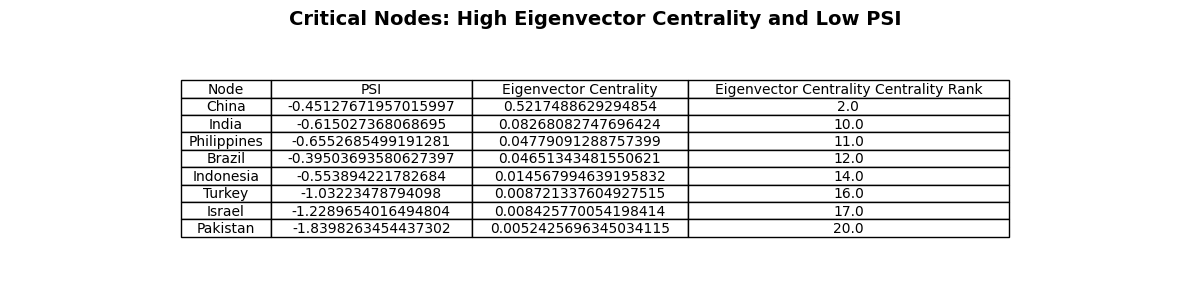

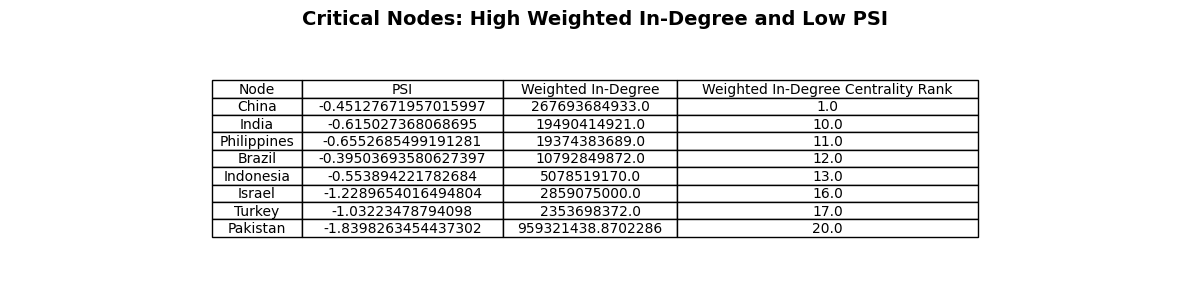

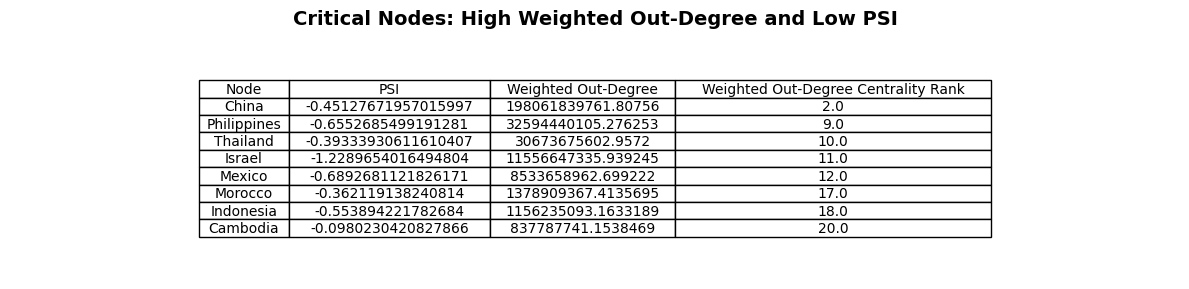

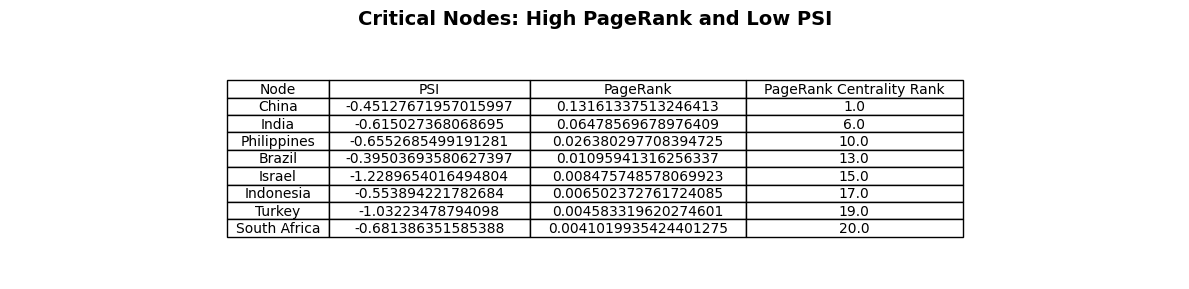

Saved EPS file at /content/drive/MyDrive/ProjectWork/Output_EPS/correlation_matrix_PSI.eps


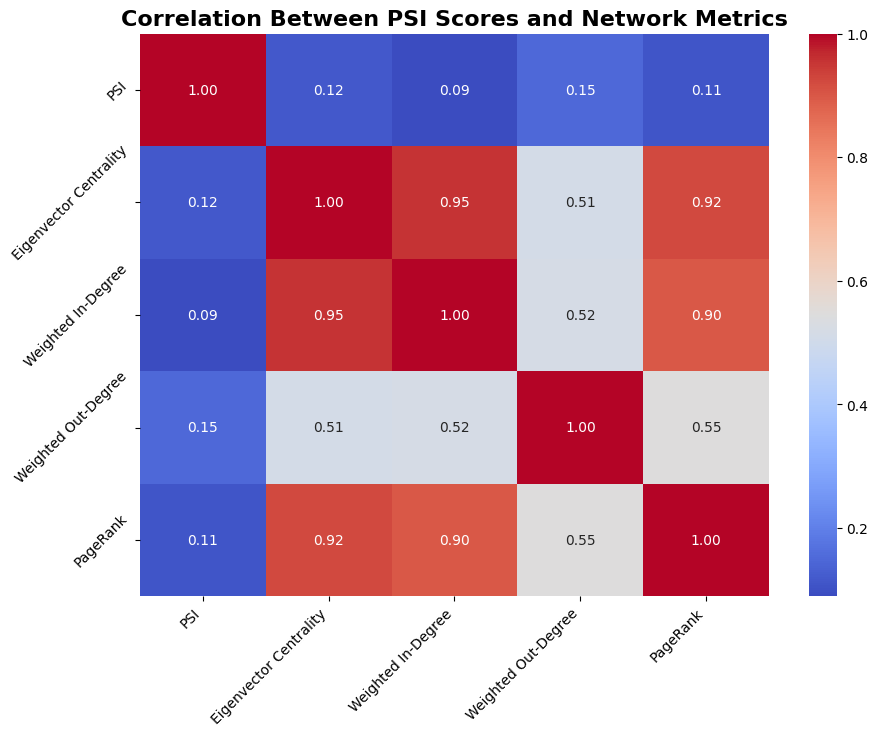

In [ ]:
#############################
#Important Nodes with low PSI
#############################
output_directory = "/content/drive/MyDrive/ProjectWork/Output_EPS"
os.makedirs(output_directory, exist_ok=True)

#Define PSI and centrality thresholds
psi_threshold = 0  #Define what constitutes "low PSI"
top_centrality_percentile = 0.2  #Keep top 20% for all metrics


nodes_analysis = []
for node in graph.nodes(data=True):
    node_name = node[0]
    attributes = node[1]

    #Get PSI value
    psi = attributes.get("PSI", None)
    if psi is None:
        continue

    #Centrality scores
    ev_centrality_score = eigenvector_centrality.get(node_name, 0)
    weighted_in_degree_score = weighted_in_degree_centrality.get(node_name, 0)
    weighted_out_degree_score = weighted_out_degree_centrality.get(node_name, 0)
    pagerank_score = pagerank.get(node_name, 0)

    nodes_analysis.append({
        "Node": node_name,
        "PSI": psi,
        "Eigenvector Centrality": ev_centrality_score,
        "Weighted In-Degree": weighted_in_degree_score,
        "Weighted Out-Degree": weighted_out_degree_score,
        "PageRank": pagerank_score
    })

#Convert to DataFrame and rank nodes
nodes_df = pd.DataFrame(nodes_analysis)

#Rank nodes for each centrality measure
nodes_df["Ev Centrality Rank"] = nodes_df["Eigenvector Centrality"].rank(ascending=False)
nodes_df["Weighted In-Degree Rank"] = nodes_df["Weighted In-Degree"].rank(ascending=False)
nodes_df["Weighted Out-Degree Rank"] = nodes_df["Weighted Out-Degree"].rank(ascending=False)
nodes_df["PageRank Rank"] = nodes_df["PageRank"].rank(ascending=False)

#Filter nodes for each metric
filtered_nodes_ev = nodes_df[
    (nodes_df["PSI"] < psi_threshold) &
    (nodes_df["Ev Centrality Rank"] <= nodes_df["Ev Centrality Rank"].quantile(top_centrality_percentile))
].sort_values(by=["Ev Centrality Rank", "PSI"])

filtered_nodes_in_degree = nodes_df[
    (nodes_df["PSI"] < psi_threshold) &
    (nodes_df["Weighted In-Degree Rank"] <= nodes_df["Weighted In-Degree Rank"].quantile(top_centrality_percentile))
].sort_values(by=["Weighted In-Degree Rank", "PSI"])

filtered_nodes_out_degree = nodes_df[
    (nodes_df["PSI"] < psi_threshold) &
    (nodes_df["Weighted Out-Degree Rank"] <= nodes_df["Weighted Out-Degree Rank"].quantile(top_centrality_percentile))
].sort_values(by=["Weighted Out-Degree Rank", "PSI"])

filtered_nodes_pagerank = nodes_df[
    (nodes_df["PSI"] < psi_threshold) &
    (nodes_df["PageRank Rank"] <= nodes_df["PageRank Rank"].quantile(top_centrality_percentile))
].sort_values(by=["PageRank Rank", "PSI"])

#Create and display tables for each metric
metrics = {
    "Eigenvector Centrality": ("Ev Centrality Rank", filtered_nodes_ev),
    "Weighted In-Degree": ("Weighted In-Degree Rank", filtered_nodes_in_degree),
    "Weighted Out-Degree": ("Weighted Out-Degree Rank", filtered_nodes_out_degree),
    "PageRank": ("PageRank Rank", filtered_nodes_pagerank)
}

for metric, (rank_column, filtered_nodes) in metrics.items():
    fig, ax = plt.subplots(figsize=(12,3))
    ax.axis('off')

    #Extract the values and columns for the table
    table_data = filtered_nodes[["Node", "PSI", metric, rank_column]].values
    table_columns = ["Node", "PSI", metric, f"{metric} Centrality Rank"]


    table = ax.table(
        cellText=table_data,
        colLabels=table_columns,
        cellLoc='center',
        loc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(list(range(len(table_columns))))

    ax.set_title(f"Critical Nodes: High {metric} and Low PSI",
                 fontsize=14, weight="bold", pad=10)


    plt.tight_layout()
    plt.show()


#####################################################
#Correlations between PSI socres and network metrics
#####################################################
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlation_data = []

for file in gml_files:
    graph = nx.read_gml(file)
    year = file.split('_')[-1].split('.')[0]

    #Extract PSI scores and compute network metrics
    psi_scores = nx.get_node_attributes(graph, 'PSI')
    eigenvector_centrality = nx.eigenvector_centrality(graph, weight='weight')
    weighted_in_degree = {node: sum(data['weight'] for _, _, data in graph.in_edges(node, data=True)) for node in graph.nodes()}
    weighted_out_degree = {node: sum(data['weight'] for _, _, data in graph.out_edges(node, data=True)) for node in graph.nodes()}
    pagerank = nx.pagerank(graph, weight='weight')

    #Combine into a DataFrame
    node_data = []
    for node in graph.nodes():
        if node in psi_scores:
            node_data.append({
                "Node": node,
                "PSI": psi_scores[node],
                "Eigenvector Centrality": eigenvector_centrality.get(node, 0),
                "Weighted In-Degree": weighted_in_degree.get(node, 0),
                "Weighted Out-Degree": weighted_out_degree.get(node, 0),
                "PageRank": pagerank.get(node, 0),
            })

    node_df = pd.DataFrame(node_data)
    node_df['Year'] = year
    correlation_data.append(node_df)

#Combine all years into a single DataFrame
correlation_df = pd.concat(correlation_data)

#Compute Correlations
metrics = ["Eigenvector Centrality", "Weighted In-Degree", "Weighted Out-Degree", "PageRank"]
correlations = correlation_df[["PSI"] + metrics].corr()

#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Between PSI Scores and Network Metrics", fontsize=16, weight="bold")

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation = 45,ha='right', fontsize=10)

plt.tight_layout(pad=3.0)

eps_file_path = os.path.join(output_directory, f"correlation_matrix_PSI.eps")
plt.savefig(eps_file_path, format='eps', bbox_inches='tight', dpi=300)
print(f"Saved EPS file at {eps_file_path}")
plt.show()






# Geopolitical Scenarios Analysis

First we start with the base network Map of the Hubs and Edges

Year 2022: Threshold for edge weights set at 898965774.3499969
Year 2022: Number of edges to plot after filtering: 111


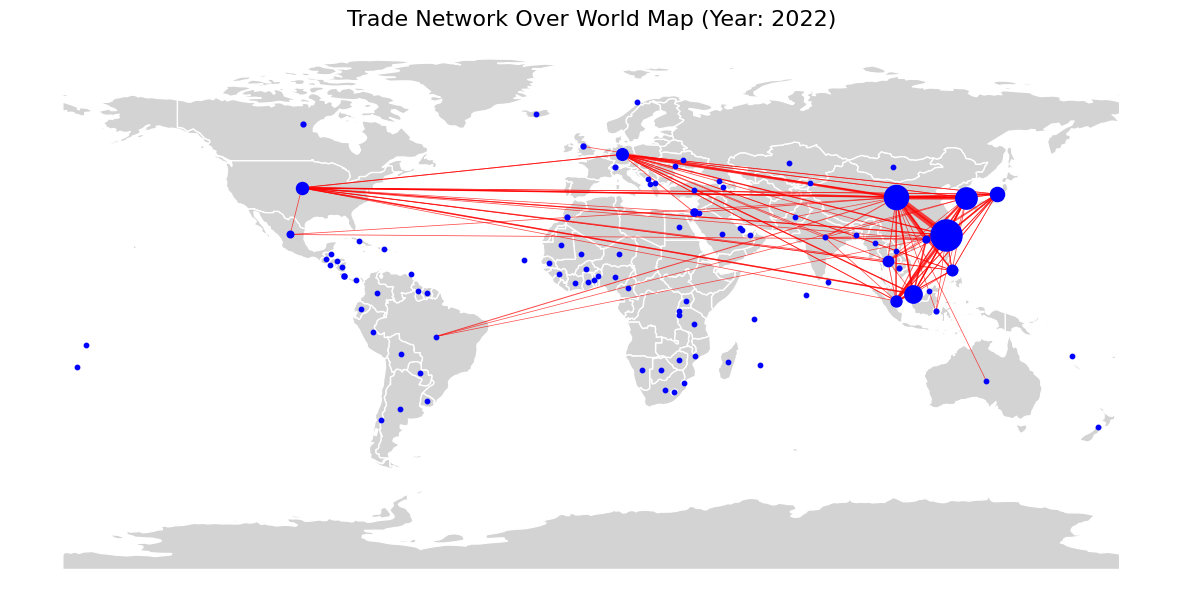

Year 2022: Missing nodes (no coordinates): []


In [ ]:
# Load world map data
world_url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(world_url)

# Create a mapping of country names to centroids
country_coords = {
    row['ADMIN']: (row.geometry.centroid.x, row.geometry.centroid.y)
    for _, row in world.iterrows()
}

# Add missing hubs (if needed)
additional_coords = {
    'Singapore': (103.8198, 1.3521),
    'Hong Kong': (114.1694, 22.3193),
    'European Union': (10.4515, 51.1657),
    'United States': (-98.5795, 39.8283),
    'Macau': (113.5491, 22.1987),
    'Samoa': (-172.1046, -13.7590),
    'Tanzania': (34.8888, -6.3690),
    'Bahrain': (50.5577, 26.0667),
    'Mauritius': (57.5522, -20.3484),
    'Seychelles': (55.4919, -4.6796),
    'Swaziland': (31.4659, -26.5225),
    'Cape Verde': (-23.0418, 15.1111),
    'Maldives': (73.2207, 3.2028),
    'Tonga': (-175.1982, -21.1789)
}
country_coords.update(additional_coords)
# Extract the 2022 graph
graph_trade = graphs["WTO_trade_graph_2022.gml"]

# Extract edge weight values
weight_values = list(nx.get_edge_attributes(graph_trade, "weight").values())

# Compute the 95th percentile of the weights
threshold = np.percentile(weight_values, 95)
print(f"Year 2022: Threshold for edge weights set at {threshold}")

# Create a filtered edge list for plotting
edges_to_plot = [
    (edge, weight) for edge, weight in nx.get_edge_attributes(graph_trade, "weight").items()
    if weight >= threshold
]
print(f"Year 2022: Number of edges to plot after filtering: {len(edges_to_plot)}")

# Extract node positions based on country names
node_positions = {node: country_coords[node] for node in graph_trade.nodes() if node in country_coords}

# Calculate the sum of outgoing weights for each node
outgoing_weights_sum = {node: 0 for node in graph_trade.nodes()}
for (source, target), weight in nx.get_edge_attributes(graph_trade, "weight").items():
    outgoing_weights_sum[source] += weight

# Normalize outgoing weights for node sizes
max_outgoing_weight = max(outgoing_weights_sum.values())
min_outgoing_weight = min(outgoing_weights_sum.values())

def normalize_node_size(weight, min_weight, max_weight, min_size=10, max_size=500):
    return min_size + (weight - min_weight) / (max_weight - min_weight) * (max_size - min_size)

# Plot the world map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='white')

# Add nodes to the plot with size based on outgoing weight sum
for node, (lon, lat) in node_positions.items():
    node_size = normalize_node_size(outgoing_weights_sum[node], min_outgoing_weight, max_outgoing_weight)
    ax.scatter(lon, lat, color='blue', s=node_size, zorder=5)

# Normalize edge weights for thickness
max_weight = max(weight for _, weight in edges_to_plot)
min_weight = min(weight for _, weight in edges_to_plot)

def normalize_weight(weight, min_weight, max_weight, min_thickness=0.5, max_thickness=5.0):
    return min_thickness + (weight - min_weight) / (max_weight - min_weight) * (max_thickness - min_thickness)

# Add edges to the plot with varying thickness
for (edge, weight) in edges_to_plot:
    if edge[0] in node_positions and edge[1] in node_positions:
        lon1, lat1 = node_positions[edge[0]]
        lon2, lat2 = node_positions[edge[1]]
        linewidth = normalize_weight(weight, min_weight, max_weight)
        ax.plot([lon1, lon2], [lat1, lat2], color='red', alpha=0.7, linewidth=linewidth, zorder=4)

# Set plot details
ax.set_title('Trade Network Over World Map (Year: 2022)', fontsize=16)
ax.axis('off')

# Display the plot
plt.show()

# Identify missing nodes
missing_nodes = [node for node in graph_trade.nodes() if node not in country_coords]
print(f"Year 2022: Missing nodes (no coordinates): {missing_nodes}")

Next we look at what happens if one nodes fails

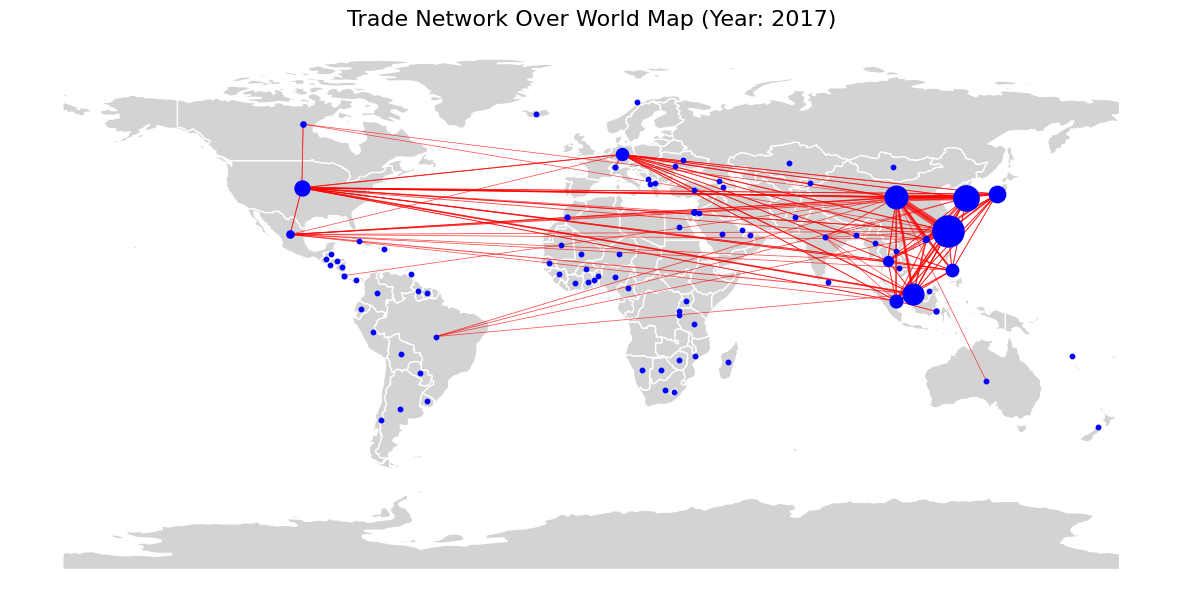

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import geopandas as gpd
import networkx as nx
import numpy as np

# Load world map data
world_url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(world_url)

# Create a mapping of country names to centroids
country_coords = {
    row['ADMIN']: (row.geometry.centroid.x, row.geometry.centroid.y)
    for _, row in world.iterrows()
}

# Add missing hubs
country_coords.update({
    'Singapore': (103.8198, 1.3521),
    'Hong Kong': (114.1694, 22.3193),
    'European Union': (10.4515, 51.1657),
    'United States': (-98.5795, 39.8283),
    'Macau': (113.5491, 22.1987),
    'Tanzania': (34.8888, -6.3690),
    'Taiwan': (121.5654, 25.0330)  # Taiwan is represented as an individual node
})

# Normalize node sizes
def normalize_node_size(weight, min_weight, max_weight, min_size=10, max_size=500):
    return min_size + (weight - min_weight) / (max_weight - min_weight) * (max_size - min_size)

# Normalize edge thickness
def normalize_weight(weight, min_weight, max_weight, min_thickness=0.5, max_thickness=5.0):
    return min_thickness + (weight - min_weight) / (max_weight - min_weight) * (max_thickness - min_thickness)

# Create an animation
def create_trade_animation(graphs, coords, failed_node=None, failure_year=None):
    fig, ax = plt.subplots(figsize=(15, 10))

    def update(frame):
        file = list(graphs.keys())[frame]
        year = file.split('_')[-1].split('.')[0]
        graph_trade = graphs[file]
        ax.clear()  # Ensure the axis is cleared before each frame
        world.plot(ax=ax, color='lightgrey', edgecolor='white')

        # If failure year is reached, remove the failed node
        if failure_year and int(year) >= failure_year and failed_node in graph_trade:
            graph_trade = graph_trade.copy()
            graph_trade.remove_node(failed_node)

        # Extract node positions
        node_positions = {node: coords[node] for node in graph_trade.nodes() if node in coords}

        # Calculate outgoing weights for node sizes
        outgoing_weights_sum = {node: 0 for node in graph_trade.nodes()}
        for (source, target), weight in nx.get_edge_attributes(graph_trade, "weight").items():
            outgoing_weights_sum[source] += weight

        max_outgoing_weight = max(outgoing_weights_sum.values(), default=1)
        min_outgoing_weight = min(outgoing_weights_sum.values(), default=0)

        # Add nodes to the plot
        for node, (lon, lat) in node_positions.items():
            node_size = normalize_node_size(outgoing_weights_sum[node], min_outgoing_weight, max_outgoing_weight)
            ax.scatter(lon, lat, color='blue', s=node_size, zorder=5)

        # Filter edges for visualization
        weight_values = list(nx.get_edge_attributes(graph_trade, "weight").values())
        threshold = np.percentile(weight_values, 95) if weight_values else 0
        edges_to_plot = [
            (edge, weight) for edge, weight in nx.get_edge_attributes(graph_trade, "weight").items()
            if weight >= threshold
        ]

        max_weight = max(weight_values, default=1)
        min_weight = min(weight_values, default=0)

        # Add edges to the plot
        for (edge, weight) in edges_to_plot:
            if edge[0] in node_positions and edge[1] in node_positions:
                lon1, lat1 = node_positions[edge[0]]
                lon2, lat2 = node_positions[edge[1]]
                linewidth = normalize_weight(weight, min_weight, max_weight)
                ax.plot([lon1, lon2], [lat1, lat2], color='red', alpha=0.7, linewidth=linewidth, zorder=4)

        # Set plot details
        ax.set_title(f'Trade Network Over World Map (Year: {year})', fontsize=16)
        ax.axis('off')

    ani = FuncAnimation(fig, update, frames=len(graphs), repeat=False)
    return ani

# Create the animation with Taiwan removed starting in 2020
ani = create_trade_animation(
    graphs, country_coords, failed_node='Taiwan', failure_year=2020
)

# Display the animation inline in Jupyter Notebook
HTML(ani.to_jshtml())

## Cascading Failure Analysis

### **Introduction**

This analysis aims to understand the impact of Taiwan's removal from the global trade network between 2017 and 2022. By simulating the failure of Taiwan as a node in the trade network, we analyze the cascading effects on global trade volume, network connectivity, and the efficiency of trade routes.

For each year in the network:
1. **Total Trade Volume (Before and After)**: Measures the sum of trade weights (edge weights) before and after Taiwan's removal.
2. **Number of Components (Before and After)**: Tracks the fragmentation of the network. A value greater than 1 indicates a fragmented network.
3. **Average Shortest Path Length (Before and After)**: Indicates the average efficiency of trade routes. A higher value post-removal suggests longer or less efficient routes.
4. **Trade Volume Loss**: Quantifies the reduction in global trade flows due to Taiwan’s absence.


In [ ]:
import networkx as nx
import pandas as pd

def cascading_failure_analysis(graphs, failed_node):
    """
    Perform cascading failure analysis by removing a specific node
    and measuring the network's changes in directed graphs.

    Parameters:
        graphs (dict): Dictionary of NetworkX graphs for each year.
        failed_node (str): The node to remove (e.g., 'Taiwan').

    Returns:
        results (dict): Dictionary with analysis results for each year.
    """
    results = {}

    for file, graph in graphs.items():
        year = file.split('_')[-1].split('.')[0]
        original_graph = graph.copy()

        # Convert to undirected for certain analyses
        undirected_graph = original_graph.to_undirected()

        # Metrics before failure
        total_trade_volume = sum(nx.get_edge_attributes(original_graph, "weight").values())
        num_components = nx.number_connected_components(undirected_graph)
        avg_shortest_path_length = (
            nx.average_shortest_path_length(undirected_graph)
            if nx.is_connected(undirected_graph) else None
        )

        # Remove the failed node and calculate post-failure metrics
        if failed_node in original_graph:
            graph_after_failure = original_graph.copy()
            graph_after_failure.remove_node(failed_node)

            # Convert to undirected for post-failure metrics
            undirected_after_failure = graph_after_failure.to_undirected()

            total_trade_volume_after = sum(nx.get_edge_attributes(graph_after_failure, "weight").values())
            num_components_after = nx.number_connected_components(undirected_after_failure)
            avg_shortest_path_length_after = (
                nx.average_shortest_path_length(undirected_after_failure)
                if nx.is_connected(undirected_after_failure) else None
            )
        else:
            # Node is not in the graph
            total_trade_volume_after = total_trade_volume
            num_components_after = num_components
            avg_shortest_path_length_after = avg_shortest_path_length

        # Record results
        results[year] = {
            "Total Trade Volume (Before)": total_trade_volume,
            "Total Trade Volume (After)": total_trade_volume_after,
            "Number of Components (Before)": num_components,
            "Number of Components (After)": num_components_after,
            "Avg Shortest Path Length (Before)": avg_shortest_path_length,
            "Avg Shortest Path Length (After)": avg_shortest_path_length_after,
            "Trade Volume Loss": total_trade_volume - total_trade_volume_after,
        }

    return results


# Perform cascading failure analysis on the loaded graphs
failed_node = "Taiwan"  # Node to simulate failure
results = cascading_failure_analysis(graphs, failed_node)

# Convert results to a Pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient="index")

# Display the DataFrame
print("Cascading Failure Analysis Results:")
display(results_df)

Cascading Failure Analysis Results:


Total Trade Volume (Before)  Total Trade Volume (After)  \
2017                 7.302102e+11                4.924702e+11   
2018                 7.872075e+11                5.285575e+11   
2019                 8.393918e+11                5.517238e+11   
2020                 9.398338e+11                5.923700e+11   
2021                 9.784823e+11                6.084920e+11   
2022                 1.067689e+12                6.596268e+11   

      Number of Components (Before)  Number of Components (After)  \
2017                              1                             1   
2018                              1                             1   
2019                              1                             1   
2020                              1                             1   
2021                              1                             1   
2022                              1                             1   

      Avg Shortest Path Length (Before)  Avg Shortest Path Length (After)  \
2017                           1.611214                          1.620240   
2018                           1.618429                          1.626972   
2019                           1.632035                          1.640858   
2020                           1.668485                          1.676768   
2021                           1.672439                          1.680412   
2022                           1.685859                          1.694496   

      Trade Volume Loss  
2017       2.377399e+11  
2018       2.586500e+11  
2019       2.876681e+11  
2020       3.474637e+11  
2021       3.699903e+11  
2022       4.080619e+11

### **Analysis of Results**

1. **Total Trade Volume (Before and After)**:
   - The total trade volume consistently increases year by year, reflecting global trade growth.
   - However, Taiwan's removal significantly reduces trade volume in every year:
     - In **2017**, the trade volume drops from \(7.3 \times 10^{11}\) to \(4.9 \times 10^{11}\), a loss of approximately **32.5%**.
     - By **2022**, the trade volume reduction is even greater, from \(1.07 \times 10^{12}\) to \(6.6 \times 10^{11}\), a loss of around **38%**.
   - This indicates that Taiwan's role in trade becomes increasingly critical over the years.

2. **Number of Components (Before and After)**:
   - The network has **1 component** both before and after Taiwan's removal, meaning the network remains connected despite the failure.
   - This suggests that other trade relationships compensate for Taiwan's removal, maintaining network connectivity.

3. **Average Shortest Path Length (Before and After)**:
   - The average shortest path length increases slightly post-removal:
     - In **2017**, the value increases from **1.60** to **1.61**.
     - In **2022**, it increases from **1.68** to **1.69**.
   - These minor increases suggest that while Taiwan's removal affects trade efficiency, other routes exist to mitigate severe disruptions. However, the trade routes become slightly less direct and efficient.

4. **Trade Volume Loss**:
   - The trade volume loss grows year by year:
     - **2017**: \(2.37 \times 10^{11}\)
     - **2022**: \(4.08 \times 10^{11}\)
   - This reflects Taiwan's growing importance in global trade, with its absence leading to increasing disruptions over time.

---

### **Key Insights**
- **Taiwan as a Critical Node**:
  - Taiwan plays an increasingly significant role in global trade, with its removal causing substantial disruptions in trade volume, particularly by 2022.
  
- **Resilient Connectivity**:
  - The global trade network remains connected even after Taiwan’s removal, showing robustness in terms of structural connectivity.
  
- **Marginal Impact on Trade Efficiency**:
  - The slight increases in average shortest path length indicate that trade efficiency is moderately affected but not catastrophic, likely due to alternative routes and trading partners stepping in.

## Impact Analisys of removal of Taiwan Node

In the following code, we analyze the countries most impacted by Taiwan’s removal from the global trade network by calculating the trade volume loss for each directly connected country. The results include a table and a bar chart of the top 10 most affected countries.

Countries impacted by the removal of Taiwan in 2022:


Country  Trade Volume Loss
11       Hong Kong       8.416363e+10
20       Singapore       4.743269e+10
37           China       2.308638e+10
9      South Korea       2.011066e+10
10           Japan       1.901756e+10
2   European Union       1.192167e+10
50        Malaysia       5.723645e+09
62   United States       5.298755e+09
6      Philippines       4.295460e+09
26        Thailand       1.599111e+09

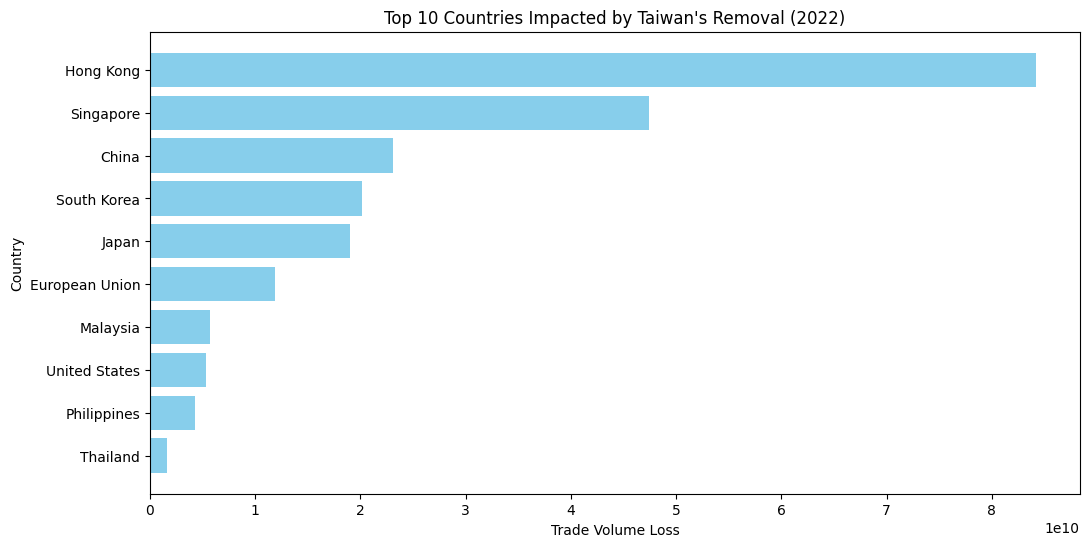

In [ ]:
def country_specific_impact(graph, failed_node):

    if failed_node not in graph:
        print(f"{failed_node} not found in the graph.")
        return None

    # Original trade relationships involving the failed node
    trade_with_failed_node = nx.get_edge_attributes(graph, "weight")
    impacted_countries = {
        target if source == failed_node else source: weight
        for (source, target), weight in trade_with_failed_node.items()
        if source == failed_node or target == failed_node
    }

    # Create a DataFrame for better visualization
    impact_df = pd.DataFrame.from_dict(impacted_countries, orient='index', columns=['Trade Volume Loss'])
    impact_df.index.name = 'Country'
    impact_df = impact_df.reset_index()
    impact_df = impact_df.sort_values(by='Trade Volume Loss', ascending=False)

    return impact_df


# Select a specific year for the analysis
year = "2022"
graph_2022 = graphs[f"WTO_trade_graph_{year}.gml"]

# Perform the country-specific impact analysis
failed_node = "Taiwan"
impact_df = country_specific_impact(graph_2022, failed_node)

# Display the results
if impact_df is not None:
    print(f"Countries impacted by the removal of {failed_node} in {year}:")
    display(impact_df.head(10))  # Show the top 10 impacted countries

    # Optional: Plot the results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    plt.barh(impact_df['Country'][:10], impact_df['Trade Volume Loss'][:10], color='skyblue')
    plt.xlabel("Trade Volume Loss")
    plt.ylabel("Country")
    plt.title(f"Top 10 Countries Impacted by {failed_node}'s Removal ({year})")
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Failure of Unstable Countries (based on PSI)

Note: In a directed network, there are two types of connected components:
- Strongly Connected Components (SCCs): Every node in the component can reach every other node via directed paths.
- Weakly Connected Components (WCCs): Connections are considered regardless of edge direction (equivalent to treating the network as undirected).


Our Analysis focuses on SCCs (nx.strongly_connected_components), which is appropriate for directed networks but may lead to very different results compared to WCCs.

- When nodes are removed, the SCCs tend to fragment much faster than WCCs because the directionality of edges makes the network more vulnerable to disruptions.

- Removing a single node can cause a chain reaction, breaking apart SCCs that are highly dependent on directional paths.

## Result:
Under the assumption that the disappeareance of a node (country) is more likely if the country is less politically stable (lower PSI score). Then the fragmentation process of the network by removing low PSI-countries first reflects the real-world better, then just removing nodes (countries) at random.  

Therefore, if the relative size of the LCC decreases less rapidly when nodes with the lowest PSI are removed compared to a random removal process, this means that the trade network is more robust than expected without the information about a countries stability. In our case, we observe that the conditional robustness (removal based on PSI) is stronger than the unconditional robustness (random removal). This provides suggestive evidence that the semiconductor trade network is resilient and not critically endangered by the fragility of politically unstable countries. **Furthermore, we can see that this resilience increased significantely during the periodes 2017 to 2022.**



Saved EPS file at /content/drive/MyDrive/ProjectWork/Output_EPS/LCC_Decay.eps


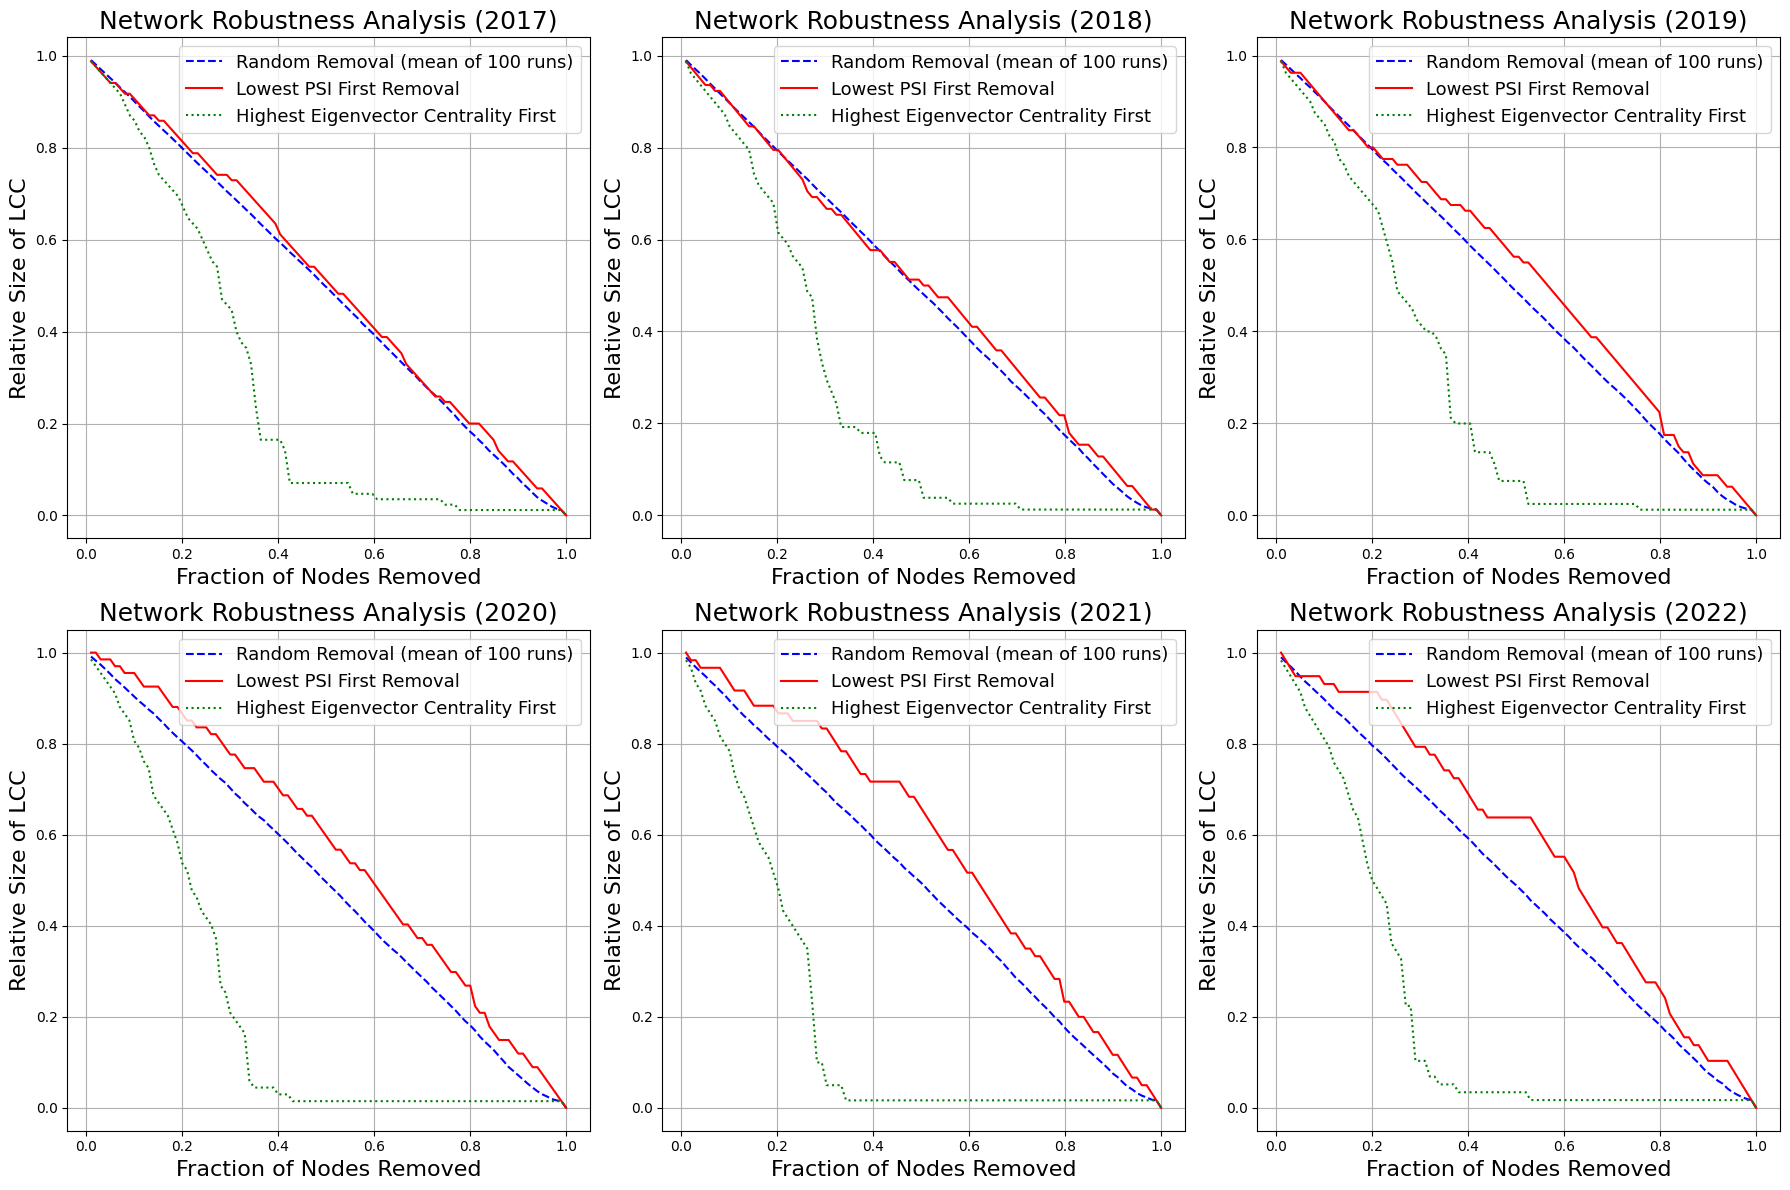

In [ ]:
output_directory = "/content/drive/MyDrive/ProjectWork/Output_EPS"
os.makedirs(output_directory, exist_ok=True)

# Load gml-files
gml_files = [
    "WTO_trade_graph_2017.gml",
    "WTO_trade_graph_2018.gml",
    "WTO_trade_graph_2019.gml",
    "WTO_trade_graph_2020.gml",
    "WTO_trade_graph_2021.gml",
    "WTO_trade_graph_2022.gml"
]

graphs = {}
for file in gml_files:
    graph = nx.read_gml(file)
    graphs[file] = graph

# Compute the relative size of the LCC
def relative_lcc_size(graph, initial_lcc_size):
    if len(graph) == 0:
        return 0
    if nx.is_directed(graph):
        largest_cc = max(nx.strongly_connected_components(graph), key=len)
    else:
        largest_cc = max(nx.connected_components(graph), key=len)
    return len(largest_cc) / initial_lcc_size

# Node removal scenarios
def simulate_node_removal(graph, strategy="random", random_repeats=100):
    initial_lcc_size = len(max(nx.strongly_connected_components(graph), key=len)) if nx.is_directed(graph) else len(max(nx.connected_components(graph), key=len))
    total_nodes = len(graph)
    nodes = list(graph.nodes(data=True))

    if strategy == "random":
        all_random_lcc_sizes = []
        for _ in range(random_repeats):
            G_copy = graph.copy()
            random_nodes = nodes.copy()
            random.shuffle(random_nodes)
            lcc_sizes = []
            for i, node in enumerate(random_nodes):
                G_copy.remove_node(node[0])
                lcc_sizes.append(relative_lcc_size(G_copy, initial_lcc_size))
            all_random_lcc_sizes.append(lcc_sizes)

        mean_lcc_sizes = np.mean(all_random_lcc_sizes, axis=0)
        fractions_removed = [(i + 1) / total_nodes for i in range(total_nodes)]
        return fractions_removed, mean_lcc_sizes

    elif strategy == "psi":
        nodes.sort(key=lambda x: x[1].get("PSI", float("inf")))
        G_copy = graph.copy()
        lcc_sizes = []
        fractions_removed = []
        for i, node in enumerate(nodes):
            G_copy.remove_node(node[0])
            lcc_sizes.append(relative_lcc_size(G_copy, initial_lcc_size))
            fractions_removed.append((i + 1) / total_nodes)
        return fractions_removed, lcc_sizes

    elif strategy == "eigenvector":
        # Compute eigenvector centrality
        eigenvector_centrality = nx.eigenvector_centrality(graph)
        # Sort nodes by eigenvector centrality (descending order)
        nodes_sorted = sorted(graph.nodes, key=lambda n: eigenvector_centrality[n], reverse=True)
        G_copy = graph.copy()
        lcc_sizes = []
        fractions_removed = []
        for i, node in enumerate(nodes_sorted):
            G_copy.remove_node(node)
            lcc_sizes.append(relative_lcc_size(G_copy, initial_lcc_size))
            fractions_removed.append((i + 1) / total_nodes)
        return fractions_removed, lcc_sizes

    else:
        raise ValueError("Invalid strategy. Use 'random', 'psi', or 'eigenvector'.")

# Analyze each graph and create a 3x2 grid for plots
random_repeats = 100  # number of randomization runs
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Iterate over graphs and plot in the grid
for idx, (file, graph) in enumerate(graphs.items()):
    year = file.split('_')[-1].split('.')[0]

    fractions_random, lcc_sizes_random = simulate_node_removal(graph, strategy="random", random_repeats=random_repeats)
    fractions_psi, lcc_sizes_psi = simulate_node_removal(graph, strategy="psi")
    fractions_eigenvector, lcc_sizes_eigenvector = simulate_node_removal(graph, strategy="eigenvector")

    # Plot in the corresponding subplot
    ax = axes[idx]
    ax.plot(fractions_random, lcc_sizes_random, label=f"Random Removal (mean of {random_repeats} runs)", linestyle="--", color="blue")
    ax.plot(fractions_psi, lcc_sizes_psi, label="Lowest PSI First Removal", linestyle="-", color="red")
    ax.plot(fractions_eigenvector, lcc_sizes_eigenvector, label="Highest Eigenvector Centrality First", linestyle=":", color="green")

    # Customize the subplot
    ax.set_xlabel("Fraction of Nodes Removed", fontsize=16)
    ax.set_ylabel("Relative Size of LCC", fontsize=16)
    ax.set_title(f"Network Robustness Analysis ({year})", fontsize=18)
    ax.legend(loc="upper right", fontsize=13)
    ax.grid(True)

# Adjust spacing and layout
plt.tight_layout()

# Save the figure as .eps
eps_file_path = os.path.join(output_directory, f"LCC_Decay.eps")
plt.savefig(eps_file_path, format='eps', dpi=300)
print(f"Saved EPS file at {eps_file_path}")
plt.show()

## Impact on Trade Volume

In this analysis, we assume that the trade volume associated with removed nodes
(unstable countries) is entirely lost. However, in reality, this trade volume could be redistributed among other countries. The exact nature of this redistribution is uncertain and depends on various factors. Nonetheless, such redistribution would take time, and the sudden disappearance of fragile countries would likely cause significant supply chain disruptions.

As the analysis shows, the decay in trade volume under the PSI-based removal
regime is less severe compared to random removal. This suggests that the trade network is more resilient than it might appear without accounting for the stability of individual countries. Moreover, if we assume that no more than the bottom 20% of countries in the PSI distribution would be removed, the resulting loss in trade volume would be over four times smaller than under a random removal process. The sharp declines observed in the PSI-based removal processes correspond to the percentiles in the PSI distribution of key trading countries (see analysis below).



Saved EPS file at /content/drive/MyDrive/ProjectWork/Output_EPS/World_Trade_Decay.eps


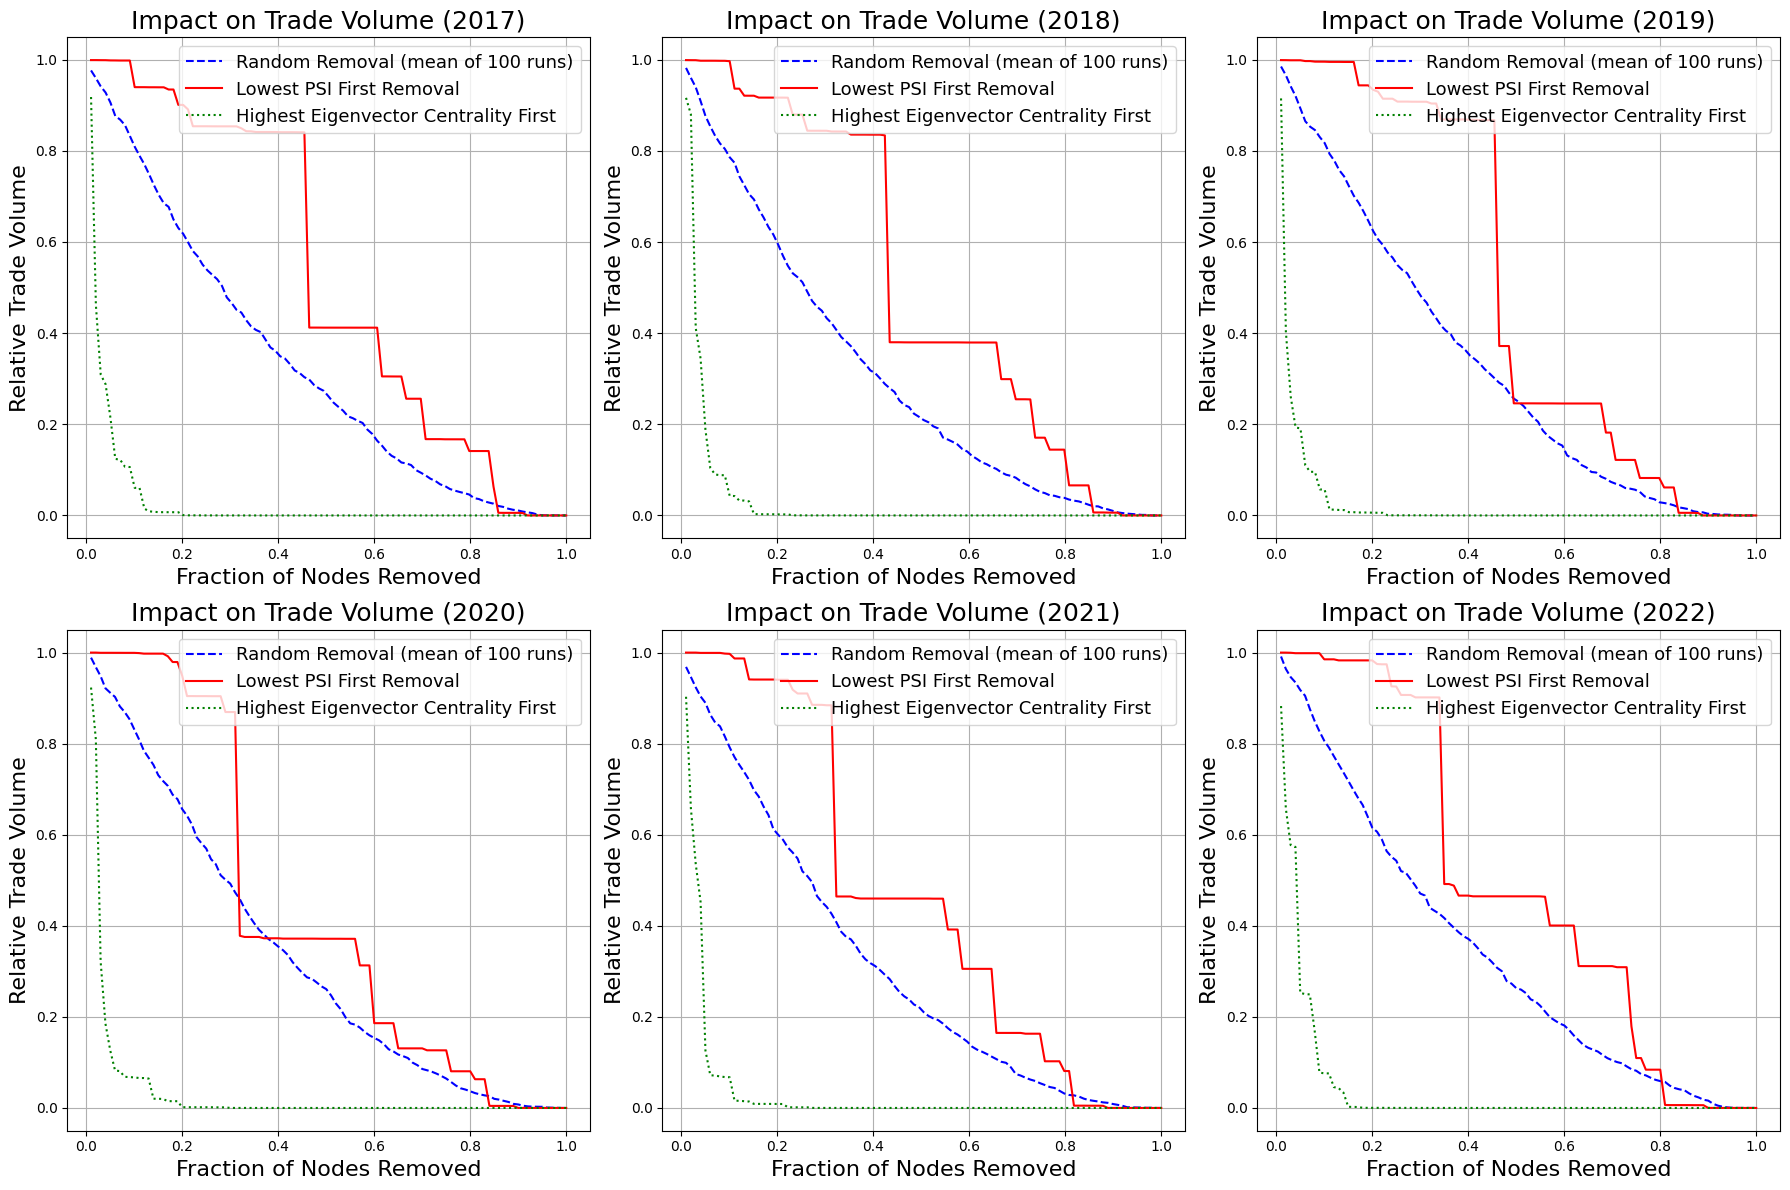

In [21]:
# Function to compute the relative trade volume
def relative_trade_volume(graph, initial_trade_volume):
    current_trade_volume = sum(d["weight"] for u, v, d in graph.edges(data=True))
    return current_trade_volume / initial_trade_volume

# Node removal Strategies
def simulate_node_removal_trade_volume(graph, strategy="random", random_repeats=100):
    # Calculate the initial trade volume
    initial_trade_volume = sum(d["weight"] for u, v, d in graph.edges(data=True))
    total_nodes = len(graph)
    nodes = list(graph.nodes(data=True))

    if strategy == "random":
        all_random_trade_volumes = []
        for _ in range(random_repeats):
            G_copy = graph.copy()
            random_nodes = nodes.copy()
            random.shuffle(random_nodes)
            trade_volumes = []
            for i, node in enumerate(random_nodes):
                G_copy.remove_node(node[0])
                trade_volumes.append(relative_trade_volume(G_copy, initial_trade_volume))
            all_random_trade_volumes.append(trade_volumes)

        mean_trade_volumes = np.mean(all_random_trade_volumes, axis=0)
        fractions_removed = [(i + 1) / total_nodes for i in range(total_nodes)]
        return fractions_removed, mean_trade_volumes

    elif strategy == "psi":
        nodes.sort(key=lambda x: x[1].get("PSI", float("inf")))
        G_copy = graph.copy()
        trade_volumes = []
        fractions_removed = []
        for i, node in enumerate(nodes):
            G_copy.remove_node(node[0])
            trade_volumes.append(relative_trade_volume(G_copy, initial_trade_volume))
            fractions_removed.append((i + 1) / total_nodes)
        return fractions_removed, trade_volumes

    elif strategy == "eigenvector":
        # Compute eigenvector centrality
        eigenvector_centrality = nx.eigenvector_centrality(graph)
        nodes_sorted = sorted(graph.nodes, key=lambda n: eigenvector_centrality[n], reverse=True)
        G_copy = graph.copy()
        trade_volumes = []
        fractions_removed = []
        for i, node in enumerate(nodes_sorted):
            G_copy.remove_node(node)
            trade_volumes.append(relative_trade_volume(G_copy, initial_trade_volume))
            fractions_removed.append((i + 1) / total_nodes)
        return fractions_removed, trade_volumes

    else:
        raise ValueError("Invalid strategy. Use 'random', 'psi', or 'eigenvector'.")

# Plot in a 3x2 grid layout
random_repeats = 100  # Number of randomization runs
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Iterate over graphs and plot in the grid
for idx, (file, graph) in enumerate(graphs.items()):
    year = file.split('_')[-1].split('.')[0]

    fractions_random, trade_volumes_random = simulate_node_removal_trade_volume(graph, strategy="random", random_repeats=random_repeats)

    fractions_psi, trade_volumes_psi = simulate_node_removal_trade_volume(graph, strategy="psi")

    fractions_eigenvector, trade_volumes_eigenvector = simulate_node_removal_trade_volume(graph, strategy="eigenvector")

    ax = axes[idx]
    ax.plot(fractions_random, trade_volumes_random, label=f"Random Removal (mean of {random_repeats} runs)", linestyle="--", color="blue")
    ax.plot(fractions_psi, trade_volumes_psi, label="Lowest PSI First Removal", linestyle="-", color="red")
    ax.plot(fractions_eigenvector, trade_volumes_eigenvector, label="Highest Eigenvector Centrality First", linestyle=":", color="green")

    ax.set_xlabel("Fraction of Nodes Removed", fontsize=16)
    ax.set_ylabel("Relative Trade Volume", fontsize=16)
    ax.set_title(f"Impact on Trade Volume ({year})", fontsize=18)
    ax.legend(loc="upper right", fontsize=13)
    ax.grid(True)

plt.tight_layout()

# Save the figure as .eps
eps_file_path = os.path.join(output_directory, f"World_Trade_Decay.eps")
plt.savefig(eps_file_path, format='eps', dpi=300)
print(f"Saved EPS file at {eps_file_path}")
plt.show()

Saved EPS file at /content/drive/MyDrive/ProjectWork/Output_EPS/PSI_percentiles.eps


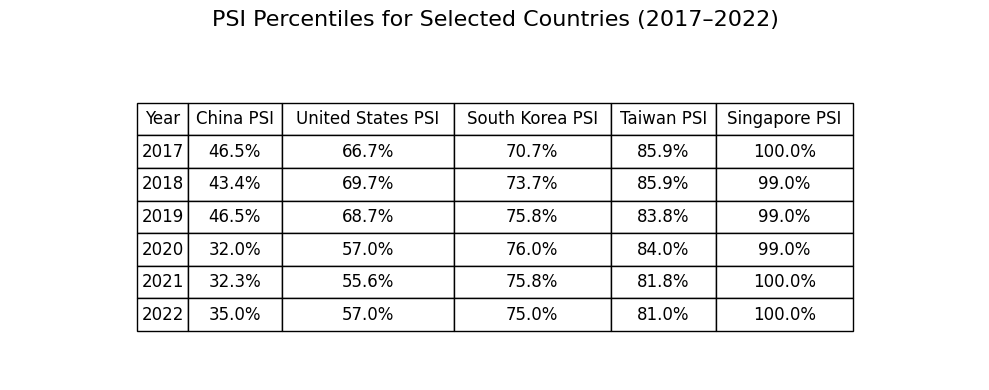

In [26]:
from scipy.stats import percentileofscore
countries = ["China", "United States", "South Korea", "Taiwan", "Singapore"]

# Calculate the PSI percentile for a given country
def calculate_psi_percentiles(graph_files, country):
    results = []
    for file in graph_files:
        try:
            graph = nx.read_gml(file)
            psi_values = [data['PSI'] for node, data in graph.nodes(data=True) if 'PSI' in data]
            country_psi = next(data['PSI'] for node, data in graph.nodes(data=True) if node == country)
            percentile = percentileofscore(psi_values, country_psi, kind='rank')
            year = file.split('_')[-1].split('.')[0]
            # Append result to the list
            results.append({"Year": year, f"{country} PSI": f"{percentile:.2f}%"})

        except FileNotFoundError:
            results.append({"Year": file.split('_')[-1], f"{country} PSI Percentile": "File Not Found"})
        except StopIteration:
            results.append({"Year": file.split('_')[-1], f"{country} PSI Percentile": f"{country} Not Found"})
        except Exception as e:
            results.append({"Year": file.split('_')[-1], f"{country} PSI Percentile": f"Error: {str(e)}"})
    return pd.DataFrame(results)

all_results = []
for country in countries:
    df = calculate_psi_percentiles(gml_files, country)
    all_results.append(df)

final_df = all_results[0]
for df in all_results[1:]:
    final_df = final_df.merge(df, on="Year", how="outer")

# Plot the table
def plot_psi_table(dataframe, title="PSI Percentiles for Selected Countries", row_height=0.1):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('off')
    ax.axis('tight')

    table = plt.table(
        cellText=dataframe.values,
        colLabels=dataframe.columns,
        loc='center',
        cellLoc='center',
        colLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    for cell in table.get_celld().values():
        cell.set_height(row_height)
    table.auto_set_column_width(range(len(dataframe.columns)))

    plt.title(title, fontsize=16, pad=20)

    plt.tight_layout()

    eps_file_path = os.path.join(output_directory, f"PSI_percentiles.eps")
    plt.savefig(eps_file_path, format='eps', dpi=300)
    print(f"Saved EPS file at {eps_file_path}")
    plt.show()

# Round all numeric values to one decimal point
final_df.iloc[:, 1:] = final_df.iloc[:, 1:].replace('%', '', regex=True).astype(float).round(1).astype(str) + '%'

# Call the function
plot_psi_table(final_df, title="PSI Percentiles for Selected Countries (2017–2022)")